<a href="https://colab.research.google.com/github/potatosoupx/python/blob/main/ptb-colab/Patient_264_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

목차 중

* offset제거 / High pass filter
* Patient_104 3차원 Dipole Model
* Patient_150 3차원 Dipole Model
* Patient_236 3차원 Dipole Model
* Patient_264 3차원 Dipole Model
* 104 3 loop

진행하지 않아도 상관 없음(이전 개별 VCG Dipole 모델 적용 해보기 시도 -> 결국 average VCG로 Lead 계산하기로 결정)

* Torso Model 목차에서는 test를 위해 확인 진행한 부분
* fin 은 patch 위치 다르게 적용했을 때
* LL 수정 -> 논문에 작성한 결과
* Lead2 - Lead1 Raw 데이터 확인 (Lead3 측정이 정확하게 되었는지 확인을 위함)

In [ ]:
import scipy.signal as signal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.pyplot as plt
%matplotlib inline

# OffSet제거 / High pass filter

In [ ]:
cut_174 = pd.read_csv('/content/drive/MyDrive/Patient/cut_174.csv')
pr_start = 420
pr_end = 460
i_174 = cut_174['i'] - np.mean(cut_174['i'][pr_start:pr_end])
ii_174 = cut_174['ii'] - np.mean(cut_174['ii'][pr_start:pr_end])
iii_174 = cut_174['iii'] - np.mean(cut_174['iii'][pr_start:pr_end])
avr_174 = cut_174['avr'] - np.mean(cut_174['avr'][pr_start:pr_end])
avl_174 = cut_174['avl'] - np.mean(cut_174['avl'][pr_start:pr_end])
avf_174 = cut_174['avf'] - np.mean(cut_174['avf'][pr_start:pr_end])
v1_174 = cut_174['v1'] - np.mean(cut_174['v1'][pr_start:pr_end])
v2_174 = cut_174['v2'] - np.mean(cut_174['v2'][pr_start:pr_end])
v3_174 = cut_174['v3'] - np.mean(cut_174['v3'][pr_start:pr_end])
v4_174 = cut_174['v4'] - np.mean(cut_174['v4'][pr_start:pr_end])
v5_174 = cut_174['v5'] - np.mean(cut_174['v5'][pr_start:pr_end])
v6_174 = cut_174['v6'] - np.mean(cut_174['v6'][pr_start:pr_end])
vx_174 = cut_174['vx'] - np.mean(cut_174['vx'][pr_start:pr_end])
vy_174 = cut_174['vy'] - np.mean(cut_174['vy'][pr_start:pr_end])
vz_174 = cut_174['vz'] - np.mean(cut_174['vz'][pr_start:pr_end])

# 배열 데이터를 DataFrame으로 저장
patient_174 = pd.DataFrame({
    'i': i_174,
    'ii': ii_174,
    'iii': iii_174,
    'avr': avr_174,
    'avl': avl_174,
    'avf': avf_174,
    'v1': v1_174,
    'v2': v2_174,
    'v3': v3_174,
    'v4': v4_174,
    'v5': v5_174,
    'v6': v6_174,
    'vx': vx_174,
    'vy': vy_174,
    'vz': vz_174
})

sos1 = signal.butter(2, 0.1, 'high', fs=1000, output='sos')
patient_174 = signal.sosfilt(sos1, patient_174)
patient_174 = pd.DataFrame(patient_174, columns=['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz'])

In [ ]:
cut_236 = pd.read_csv('/content/drive/MyDrive/Patient/cut_236.csv')
pr_start = 420
pr_end = 460
i_236 = cut_236['i'] - np.mean(cut_236['i'][pr_start:pr_end])
ii_236 = cut_236['ii'] - np.mean(cut_236['ii'][pr_start:pr_end])
iii_236 = cut_236['iii'] - np.mean(cut_236['iii'][pr_start:pr_end])
avr_236 = cut_236['avr'] - np.mean(cut_236['avr'][pr_start:pr_end])
avl_236 = cut_236['avl'] - np.mean(cut_236['avl'][pr_start:pr_end])
avf_236 = cut_236['avf'] - np.mean(cut_236['avf'][pr_start:pr_end])
v1_236 = cut_236['v1'] - np.mean(cut_236['v1'][pr_start:pr_end])
v2_236 = cut_236['v2'] - np.mean(cut_236['v2'][pr_start:pr_end])
v3_236 = cut_236['v3'] - np.mean(cut_236['v3'][pr_start:pr_end])
v4_236 = cut_236['v4'] - np.mean(cut_236['v4'][pr_start:pr_end])
v5_236 = cut_236['v5'] - np.mean(cut_236['v5'][pr_start:pr_end])
v6_236 = cut_236['v6'] - np.mean(cut_236['v6'][pr_start:pr_end])
vx_236 = cut_236['vx'] - np.mean(cut_236['vx'][pr_start:pr_end])
vy_236 = cut_236['vy'] - np.mean(cut_236['vy'][pr_start:pr_end])
vz_236 = cut_236['vz'] - np.mean(cut_236['vz'][pr_start:pr_end])

# 배열 데이터를 DataFrame으로 저장
patient_236 = pd.DataFrame({
    'i': i_236,
    'ii': ii_236,
    'iii': iii_236,
    'avr': avr_236,
    'avl': avl_236,
    'avf': avf_236,
    'v1': v1_236,
    'v2': v2_236,
    'v3': v3_236,
    'v4': v4_236,
    'v5': v5_236,
    'v6': v6_236,
    'vx': vx_236,
    'vy': vy_236,
    'vz': vz_236
})

sos1 = signal.butter(2, 0.1, 'high', fs=1000, output='sos')
patient_236 = signal.sosfilt(sos1, patient_236)
patient_236 = pd.DataFrame(patient_236, columns=['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz'])

In [ ]:
cut_155=pd.read_csv('/content/drive/MyDrive/Patient/cut_155.csv')
pr_start = 420
pr_end = 460
i_155 = cut_155['i'] - np.mean(cut_155['i'][pr_start:pr_end])
ii_155 = cut_155['ii'] - np.mean(cut_155['ii'][pr_start:pr_end])
iii_155 = cut_155['iii'] - np.mean(cut_155['iii'][pr_start:pr_end])
avr_155 = cut_155['avr'] - np.mean(cut_155['avr'][pr_start:pr_end])
avl_155 = cut_155['avl'] - np.mean(cut_155['avl'][pr_start:pr_end])
avf_155 = cut_155['avf'] - np.mean(cut_155['avf'][pr_start:pr_end])
v1_155 = cut_155['v1'] - np.mean(cut_155['v1'][pr_start:pr_end])
v2_155 = cut_155['v2'] - np.mean(cut_155['v2'][pr_start:pr_end])
v3_155 = cut_155['v3'] - np.mean(cut_155['v3'][pr_start:pr_end])
v4_155 = cut_155['v4'] - np.mean(cut_155['v4'][pr_start:pr_end])
v5_155 = cut_155['v5'] - np.mean(cut_155['v5'][pr_start:pr_end])
v6_155 = cut_155['v6'] - np.mean(cut_155['v6'][pr_start:pr_end])
vx_155 = cut_155['vx'] - np.mean(cut_155['vx'][pr_start:pr_end])
vy_155 = cut_155['vy'] - np.mean(cut_155['vy'][pr_start:pr_end])
vz_155 = cut_155['vz'] - np.mean(cut_155['vz'][pr_start:pr_end])

# 배열 데이터를 DataFrame으로 저장
patient_155 = pd.DataFrame({
    'i': i_155,
    'ii': ii_155,
    'iii': iii_155,
    'avr': avr_155,
    'avl': avl_155,
    'avf': avf_155,
    'v1': v1_155,
    'v2': v2_155,
    'v3': v3_155,
    'v4': v4_155,
    'v5': v5_155,
    'v6': v6_155,
    'vx': vx_155,
    'vy': vy_155,
    'vz': vz_155
})

sos1 = signal.butter(2, 0.1, 'high', fs=1000, output='sos')
patient_155=signal.sosfilt(sos1, patient_155)
patient_155 = pd.DataFrame(patient_155 , columns=['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz'])

In [ ]:
cut_150=pd.read_csv('/content/drive/MyDrive/Patient/cut_150.csv')
pr_start = 420
pr_end = 460
i_150 = cut_150['i'] - np.mean(cut_150['i'][pr_start:pr_end])
ii_150 = cut_150['ii'] - np.mean(cut_150['ii'][pr_start:pr_end])
iii_150 = cut_150['iii'] - np.mean(cut_150['iii'][pr_start:pr_end])
avr_150 = cut_150['avr'] - np.mean(cut_150['avr'][pr_start:pr_end])
avl_150 = cut_150['avl'] - np.mean(cut_150['avl'][pr_start:pr_end])
avf_150 = cut_150['avf'] - np.mean(cut_150['avf'][pr_start:pr_end])
v1_150= cut_150['v1'] - np.mean(cut_150['v1'][pr_start:pr_end])
v2_150 = cut_150['v2'] - np.mean(cut_150['v2'][pr_start:pr_end])
v3_150 = cut_150['v3'] - np.mean(cut_150['v3'][pr_start:pr_end])
v4_150 = cut_150['v4'] - np.mean(cut_150['v4'][pr_start:pr_end])
v5_150 = cut_150['v5'] - np.mean(cut_150['v5'][pr_start:pr_end])
v6_150 = cut_150['v6'] - np.mean(cut_150['v6'][pr_start:pr_end])
vx_150 = cut_150['vx'] - np.mean(cut_150['vx'][pr_start:pr_end])
vy_150 = cut_150['vy'] - np.mean(cut_150['vy'][pr_start:pr_end])
vz_150 = cut_150['vz'] - np.mean(cut_150['vz'][pr_start:pr_end])

# 배열 데이터를 DataFrame으로 저장
patient_150 = pd.DataFrame({
    'i': i_150,
    'ii': ii_150,
    'iii': iii_150,
    'avr': avr_150,
    'avl': avl_150,
    'avf': avf_150,
    'v1': v1_150,
    'v2': v2_150,
    'v3': v3_150,
    'v4': v4_150,
    'v5': v5_150,
    'v6': v6_150,
    'vx': vx_150,
    'vy': vy_150,
    'vz': vz_150
})

sos1 = signal.butter(2, 0.1, 'high', fs=1000, output='sos')
patient_150=signal.sosfilt(sos1, patient_150)
patient_150 = pd.DataFrame(patient_150 , columns=['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz'])

In [ ]:
cut_264=pd.read_csv('/content/drive/MyDrive/Patient/cut_264.csv')
pr_start = 420
pr_end = 460
i_264 = cut_264['i'] - np.mean(cut_264['i'][pr_start:pr_end])
ii_264 = cut_264['ii'] - np.mean(cut_264['ii'][pr_start:pr_end])
iii_264 = cut_264['iii'] - np.mean(cut_264['iii'][pr_start:pr_end])
avr_264 = cut_264['avr'] - np.mean(cut_264['avr'][pr_start:pr_end])
avl_264 = cut_264['avl'] - np.mean(cut_264['avl'][pr_start:pr_end])
avf_264 = cut_264['avf'] - np.mean(cut_264['avf'][pr_start:pr_end])
v1_264= cut_264['v1'] - np.mean(cut_264['v1'][pr_start:pr_end])
v2_264 = cut_264['v2'] - np.mean(cut_264['v2'][pr_start:pr_end])
v3_264 = cut_264['v3'] - np.mean(cut_264['v3'][pr_start:pr_end])
v4_264 = cut_264['v4'] - np.mean(cut_264['v4'][pr_start:pr_end])
v5_264 = cut_264['v5'] - np.mean(cut_264['v5'][pr_start:pr_end])
v6_264 = cut_264['v6'] - np.mean(cut_264['v6'][pr_start:pr_end])
vx_264 = cut_264['vx'] - np.mean(cut_264['vx'][pr_start:pr_end])
vy_264 = cut_264['vy'] - np.mean(cut_264['vy'][pr_start:pr_end])
vz_264 = cut_264['vz'] - np.mean(cut_264['vz'][pr_start:pr_end])

# 배열 데이터를 DataFrame으로 저장
patient_264 = pd.DataFrame({
    'i': i_264,
    'ii': ii_264,
    'iii': iii_264,
    'avr': avr_264,
    'avl': avl_264,
    'avf': avf_264,
    'v1': v1_264,
    'v2': v2_264,
    'v3': v3_264,
    'v4': v4_264,
    'v5': v5_264,
    'v6': v6_264,
    'vx': vx_264,
    'vy': vy_264,
    'vz': vz_264
})

sos1 = signal.butter(2, 0.1, 'high', fs=1000, output='sos')
patient_264=signal.sosfilt(sos1, patient_264)
patient_264 = pd.DataFrame(patient_264 , columns=['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz'])

In [ ]:
cut_104=pd.read_csv('/content/drive/MyDrive/Patient/cut_104.csv')
pr_start = 420
pr_end = 460
i_104 = cut_104['i'] - np.mean(cut_104['i'][pr_start:pr_end])
ii_104 = cut_104['ii'] - np.mean(cut_104['ii'][pr_start:pr_end])
iii_104 = cut_104['iii'] - np.mean(cut_104['iii'][pr_start:pr_end])
avr_104 = cut_104['avr'] - np.mean(cut_104['avr'][pr_start:pr_end])
avl_104 = cut_104['avl'] - np.mean(cut_104['avl'][pr_start:pr_end])
avf_104 = cut_104['avf'] - np.mean(cut_104['avf'][pr_start:pr_end])
v1_104= cut_104['v1'] - np.mean(cut_104['v1'][pr_start:pr_end])
v2_104 = cut_104['v2'] - np.mean(cut_104['v2'][pr_start:pr_end])
v3_104 = cut_104['v3'] - np.mean(cut_104['v3'][pr_start:pr_end])
v4_104 = cut_104['v4'] - np.mean(cut_104['v4'][pr_start:pr_end])
v5_104 = cut_104['v5'] - np.mean(cut_104['v5'][pr_start:pr_end])
v6_104 = cut_104['v6'] - np.mean(cut_104['v6'][pr_start:pr_end])
vx_104 = cut_104['vx'] - np.mean(cut_104['vx'][pr_start:pr_end])
vy_104 = cut_104['vy'] - np.mean(cut_104['vy'][pr_start:pr_end])
vz_104 = cut_104['vz'] - np.mean(cut_104['vz'][pr_start:pr_end])

# 배열 데이터를 DataFrame으로 저장
patient_104 = pd.DataFrame({
    'i': i_104,
    'ii': ii_104,
    'iii': iii_104,
    'avr': avr_104,
    'avl': avl_104,
    'avf': avf_104,
    'v1': v1_104,
    'v2': v2_104,
    'v3': v3_104,
    'v4': v4_104,
    'v5': v5_104,
    'v6': v6_104,
    'vx': vx_104,
    'vy': vy_104,
    'vz': vz_104
})

sos1 = signal.butter(2, 0.1, 'high', fs=1000, output='sos')
patient_104=signal.sosfilt(sos1, patient_104)
patient_104 = pd.DataFrame(patient_104 , columns=['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz'])

#Patient_104 3차원 Dipole Model

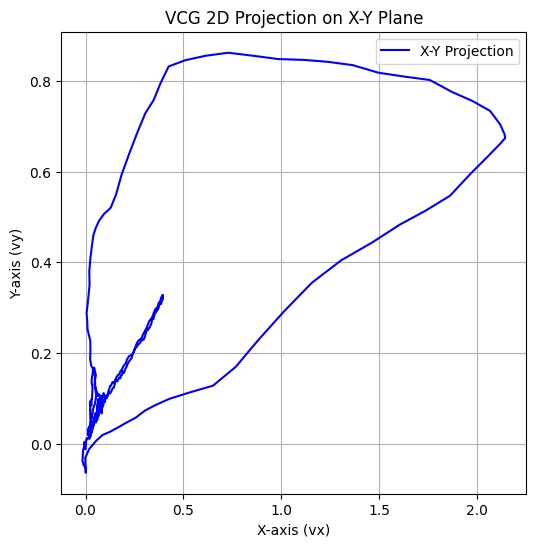

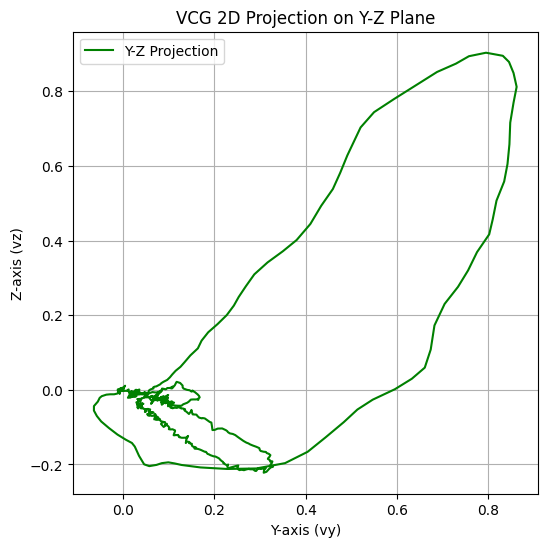

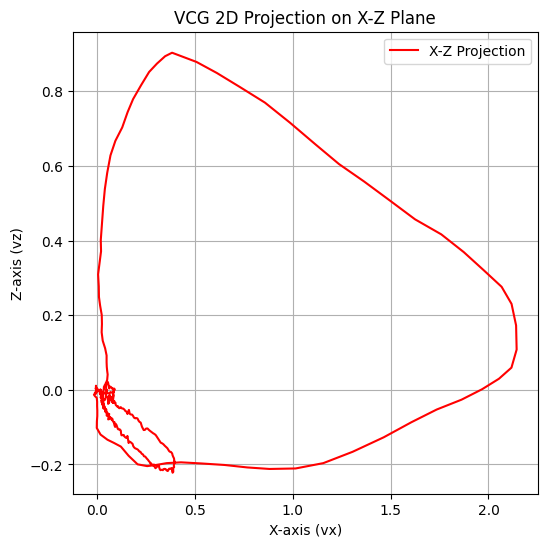

In [ ]:
# X-Y 평면 투영
plt.figure(figsize=(6, 6))
plt.plot(patient_104['vx'], patient_104['vy'], color='b', label='X-Y Projection')
plt.xlabel('X-axis (vx)')
plt.ylabel('Y-axis (vy)')
plt.title('VCG 2D Projection on X-Y Plane')
plt.legend()
plt.grid()
plt.show()

# Y-Z 평면 투영
plt.figure(figsize=(6, 6))
plt.plot(patient_104['vy'], patient_104['vz'], color='g', label='Y-Z Projection')
plt.xlabel('Y-axis (vy)')
plt.ylabel('Z-axis (vz)')
plt.title('VCG 2D Projection on Y-Z Plane')
plt.legend()
plt.grid()
plt.show()

# X-Z 평면 투영
plt.figure(figsize=(6, 6))
plt.plot(patient_104['vx'], patient_104['vz'], color='r', label='X-Z Projection')
plt.xlabel('X-axis (vx)')
plt.ylabel('Z-axis (vz)')
plt.title('VCG 2D Projection on X-Z Plane')
plt.legend()
plt.grid()
plt.show()

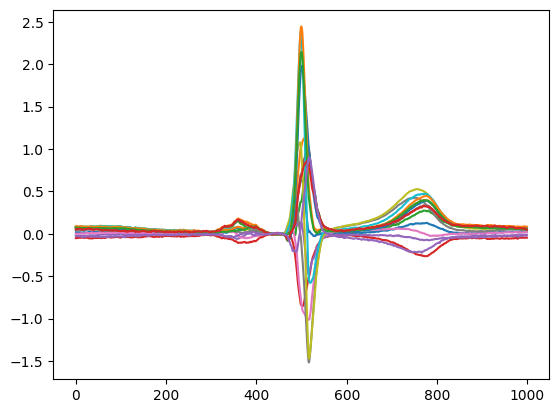

In [ ]:
plt.plot(patient_104)

In [ ]:
import plotly.graph_objects as go

# 3D 궤적 생성
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=patient_104['vx'],
    y=patient_104['vy'],
    z=patient_104['vz'],
    mode='lines+markers',
    marker=dict(size=4, color=np.arange(1000), colorscale='Viridis', opacity=0.8),
    line=dict(color='blue', width=2)
))

# 레이아웃 설정
fig.update_layout(
    scene=dict(
        xaxis_title='X-axis (vx)',
        yaxis_title='Y-axis (vy)',
        zaxis_title='Z-axis (vz)'
    ),
    title="Interactive 3D VCG Visualization"
)

fig.show()

#Patient_150 3차원 Dipole Model

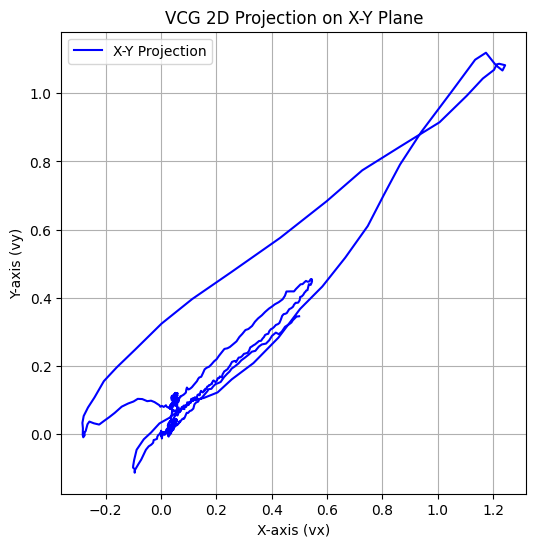

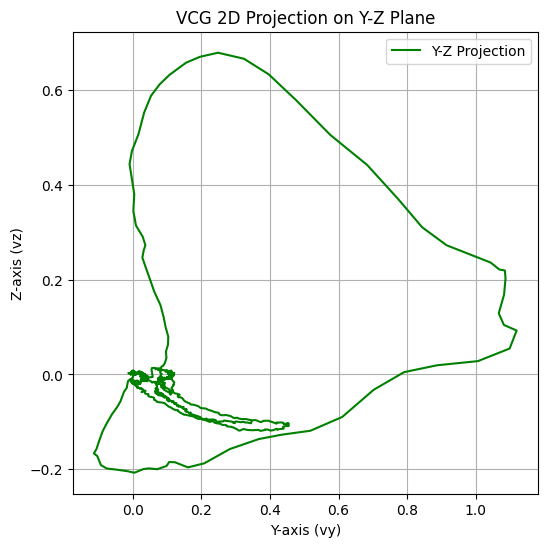

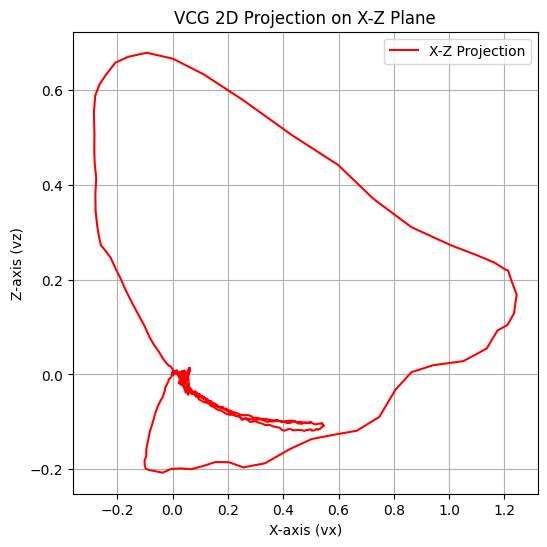

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(patient_174['vx'], patient_174['vy'], color='b', label='X-Y Projection')
plt.xlabel('X-axis (vx)')
plt.ylabel('Y-axis (vy)')
plt.title('VCG 2D Projection on X-Y Plane')
plt.legend()
plt.grid()
plt.show()

# Y-Z 평면 투영
plt.figure(figsize=(6, 6))
plt.plot(patient_174['vy'], patient_174['vz'], color='g', label='Y-Z Projection')
plt.xlabel('Y-axis (vy)')
plt.ylabel('Z-axis (vz)')
plt.title('VCG 2D Projection on Y-Z Plane')
plt.legend()
plt.grid()
plt.show()

# X-Z 평면 투영
plt.figure(figsize=(6, 6))
plt.plot(patient_174['vx'], patient_174['vz'], color='r', label='X-Z Projection')
plt.xlabel('X-axis (vx)')
plt.ylabel('Z-axis (vz)')
plt.title('VCG 2D Projection on X-Z Plane')
plt.legend()
plt.grid()
plt.show()

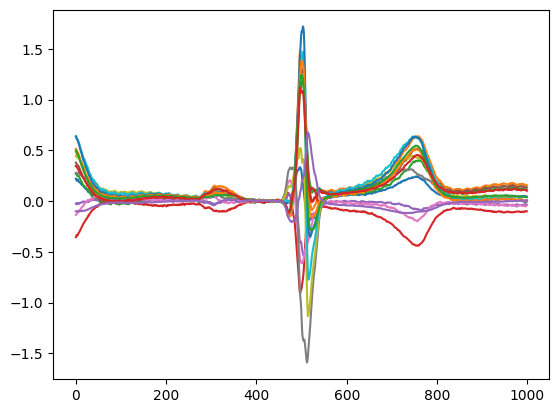

In [ ]:
plt.plot(patient_174)

In [ ]:
import plotly.graph_objects as go

# 3D 궤적 생성
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=patient_174['vx'],
    y=patient_174['vy'],
    z=patient_174['vz'],
    mode='lines+markers',
    marker=dict(size=4, color=np.arange(1000), colorscale='Viridis', opacity=0.8),
    line=dict(color='blue', width=2)
))

# 레이아웃 설정
fig.update_layout(
    scene=dict(
        xaxis_title='X-axis (vx)',
        yaxis_title='Y-axis (vy)',
        zaxis_title='Z-axis (vz)'
    ),
    title="Interactive 3D VCG Visualization"
)

fig.show()

#Patient_236 3차원 Dipole Model

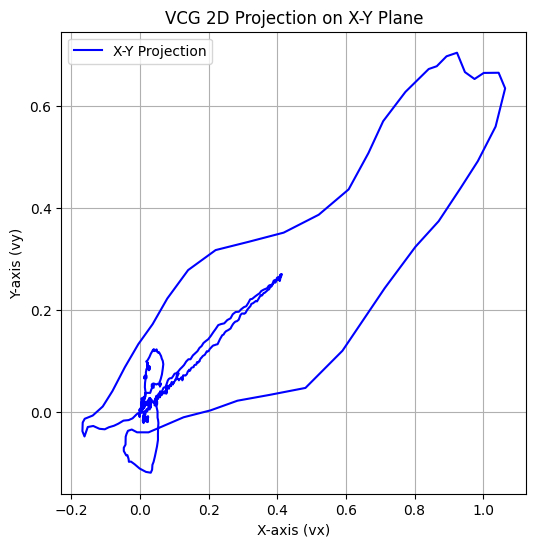

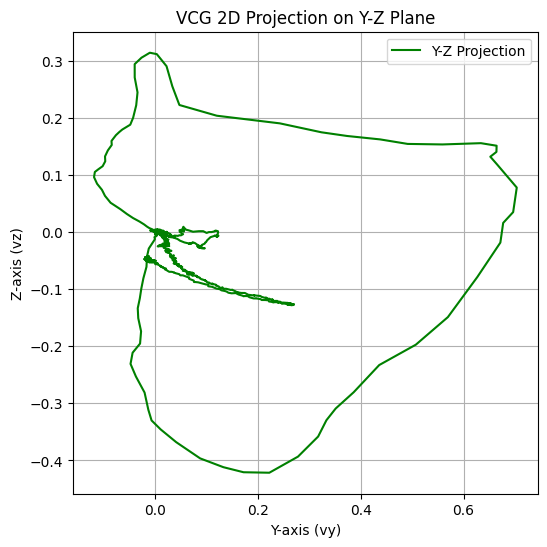

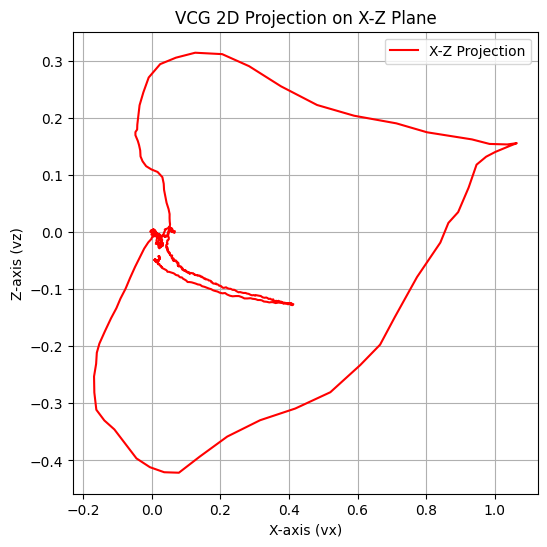

In [ ]:
# X-Y 평면 투영
plt.figure(figsize=(6, 6))
plt.plot(patient_236['vx'], patient_236['vy'], color='b', label='X-Y Projection')
plt.xlabel('X-axis (vx)')
plt.ylabel('Y-axis (vy)')
plt.title('VCG 2D Projection on X-Y Plane')
plt.legend()
plt.grid()
plt.show()

# Y-Z 평면 투영
plt.figure(figsize=(6, 6))
plt.plot(patient_236['vy'], patient_236['vz'], color='g', label='Y-Z Projection')
plt.xlabel('Y-axis (vy)')
plt.ylabel('Z-axis (vz)')
plt.title('VCG 2D Projection on Y-Z Plane')
plt.legend()
plt.grid()
plt.show()

# X-Z 평면 투영
plt.figure(figsize=(6, 6))
plt.plot(patient_236['vx'], patient_236['vz'], color='r', label='X-Z Projection')
plt.xlabel('X-axis (vx)')
plt.ylabel('Z-axis (vz)')
plt.title('VCG 2D Projection on X-Z Plane')
plt.legend()
plt.grid()
plt.show()

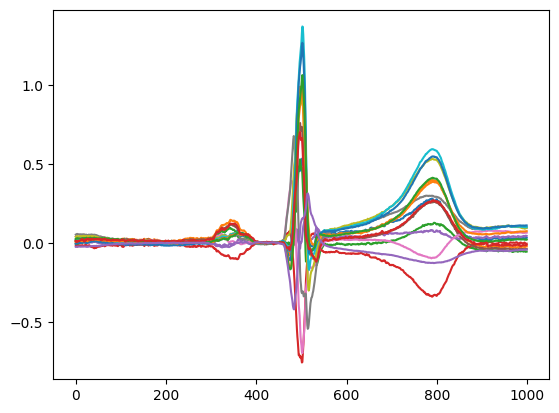

In [ ]:
plt.plot(patient_236)

In [ ]:
import plotly.graph_objects as go

# 3D 궤적 생성
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=patient_236['vx'],
    y=patient_236['vy'],
    z=patient_236['vz'],
    mode='lines+markers',
    marker=dict(size=4, color=np.arange(1000), colorscale='Viridis', opacity=0.8),
    line=dict(color='blue', width=2)
))

# 레이아웃 설정
fig.update_layout(
    scene=dict(
        xaxis_title='X-axis (vx)',
        yaxis_title='Y-axis (vy)',
        zaxis_title='Z-axis (vz)'
    ),
    title="Interactive 3D VCG Visualization"
)

fig.show()

#Patient_264 3차원 Dipole Model

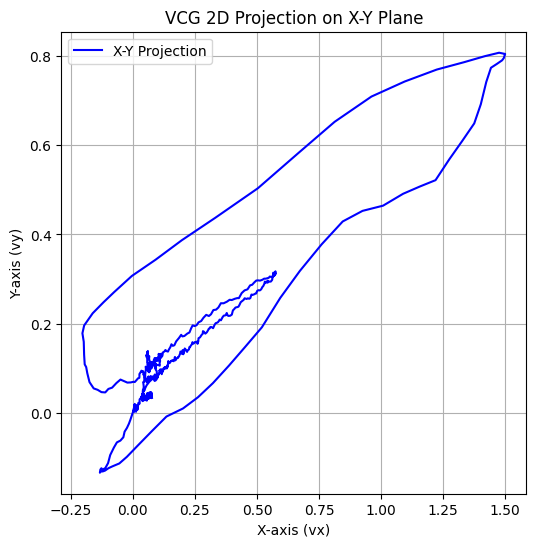

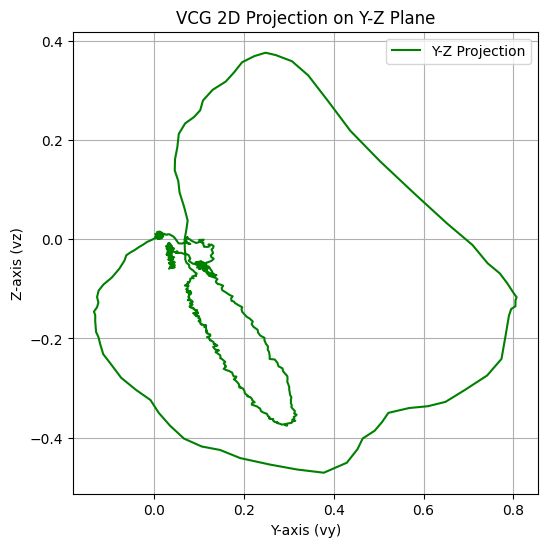

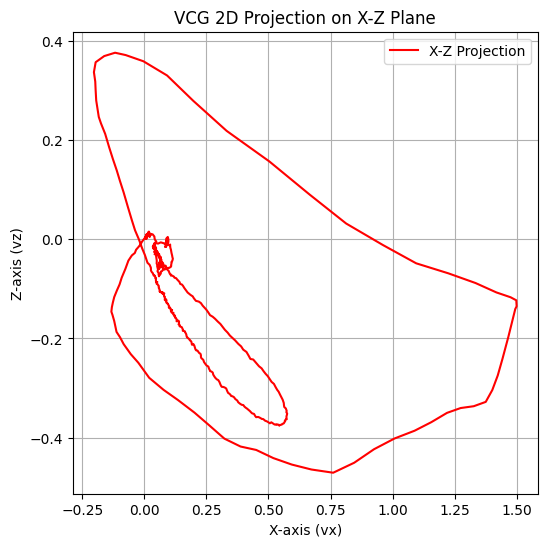

In [ ]:
# X-Y 평면 투영
plt.figure(figsize=(6, 6))
plt.plot(patient_264['vx'], patient_264['vy'], color='b', label='X-Y Projection')
plt.xlabel('X-axis (vx)')
plt.ylabel('Y-axis (vy)')
plt.title('VCG 2D Projection on X-Y Plane')
plt.legend()
plt.grid()
plt.show()

# Y-Z 평면 투영
plt.figure(figsize=(6, 6))
plt.plot(patient_264['vy'], patient_264['vz'], color='g', label='Y-Z Projection')
plt.xlabel('Y-axis (vy)')
plt.ylabel('Z-axis (vz)')
plt.title('VCG 2D Projection on Y-Z Plane')
plt.legend()
plt.grid()
plt.show()

# X-Z 평면 투영
plt.figure(figsize=(6, 6))
plt.plot(patient_264['vx'], patient_264['vz'], color='r', label='X-Z Projection')
plt.xlabel('X-axis (vx)')
plt.ylabel('Z-axis (vz)')
plt.title('VCG 2D Projection on X-Z Plane')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import plotly.graph_objects as go

# 3D 궤적 생성
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=patient_264['vx'],
    y=patient_264['vy'],
    z=patient_264['vz'],
    mode='lines+markers',
    marker=dict(size=4, color=np.arange(1000), colorscale='Viridis', opacity=0.8),
    line=dict(color='blue', width=2)
))

# 레이아웃 설정
fig.update_layout(
    scene=dict(
        xaxis_title='X-axis (vx)',
        yaxis_title='Y-axis (vy)',
        zaxis_title='Z-axis (vz)'
    ),
    title="Interactive 3D VCG Visualization"
)

fig.show()

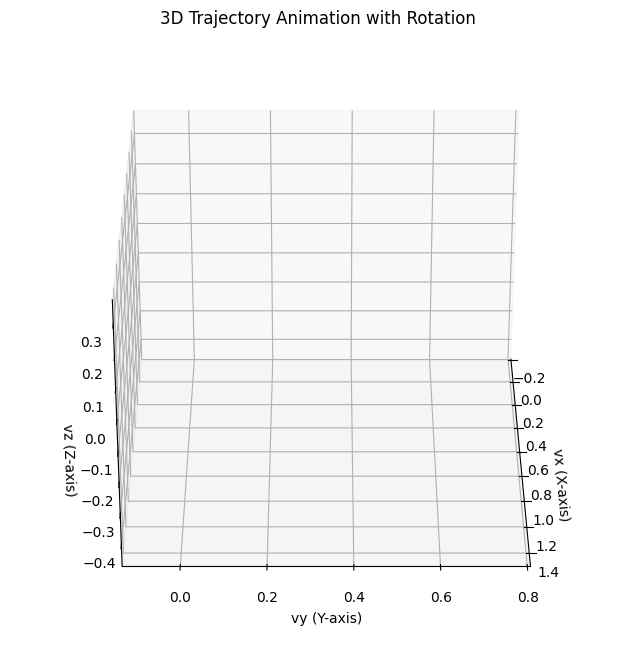

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation


# x, y, z 데이터 추출
x = patient_264['vx']
y = patient_264['vy']
z = patient_264['vz']

# 3D 플롯 초기화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 축 설정
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))
ax.set_zlim(min(z), max(z))
ax.set_xlabel("vx (X-axis)")
ax.set_ylabel("vy (Y-axis)")
ax.set_zlabel("vz (Z-axis)")
ax.set_title("3D Trajectory Animation with Rotation")

# 궤적 초기화
line, = ax.plot([], [], [], lw=2, color='blue')  # 궤적 선

# 애니메이션 업데이트 함수
def update(num):
    # 궤적 업데이트
    line.set_data(x[:num], y[:num])  # x, y 데이터 업데이트
    line.set_3d_properties(z[:num])  # z 데이터 업데이트

    # 회전 추가
    ax.view_init(elev=30, azim=num/4)  # elev는 위아래, azim은 좌우 회전

    return line,

# 애니메이션 생성
ani1 = FuncAnimation(fig, update, frames=len(x), interval=30, blit=True)

# 애니메이션 표시
plt.show()

In [ ]:
ani1.save('3d_animation.gif', writer='pillow', fps=20)

([<matplotlib.axis.XTick at 0x7d3590e61190>,
 [Text(0, 0, '0'),
  Text(20, 0, '20'),
  Text(40, 0, '40'),
  Text(60, 0, '60'),
  Text(80, 0, '80'),
  Text(100, 0, '100'),
  Text(120, 0, '120'),
  Text(140, 0, '140'),
  Text(160, 0, '160'),
  Text(180, 0, '180'),
  Text(200, 0, '200'),
  Text(220, 0, '220'),
  Text(240, 0, '240'),
  Text(260, 0, '260'),
  Text(280, 0, '280'),
  Text(300, 0, '300'),
  Text(320, 0, '320'),
  Text(340, 0, '340'),
  Text(360, 0, '360'),
  Text(380, 0, '380'),
  Text(400, 0, '400'),
  Text(420, 0, '420'),
  Text(440, 0, '440'),
  Text(460, 0, '460'),
  Text(480, 0, '480'),
  Text(500, 0, '500'),
  Text(520, 0, '520'),
  Text(540, 0, '540'),
  Text(560, 0, '560'),
  Text(580, 0, '580'),
  Text(600, 0, '600'),
  Text(620, 0, '620'),
  Text(640, 0, '640'),
  Text(660, 0, '660'),
  Text(680, 0, '680'),
  Text(700, 0, '700'),
  Text(720, 0, '720'),
  Text(740, 0, '740'),
  Text(760, 0, '760'),
  Text(780, 0, '780'),
  Text(800, 0, '800'),
  Text(820, 0, '820'),
 

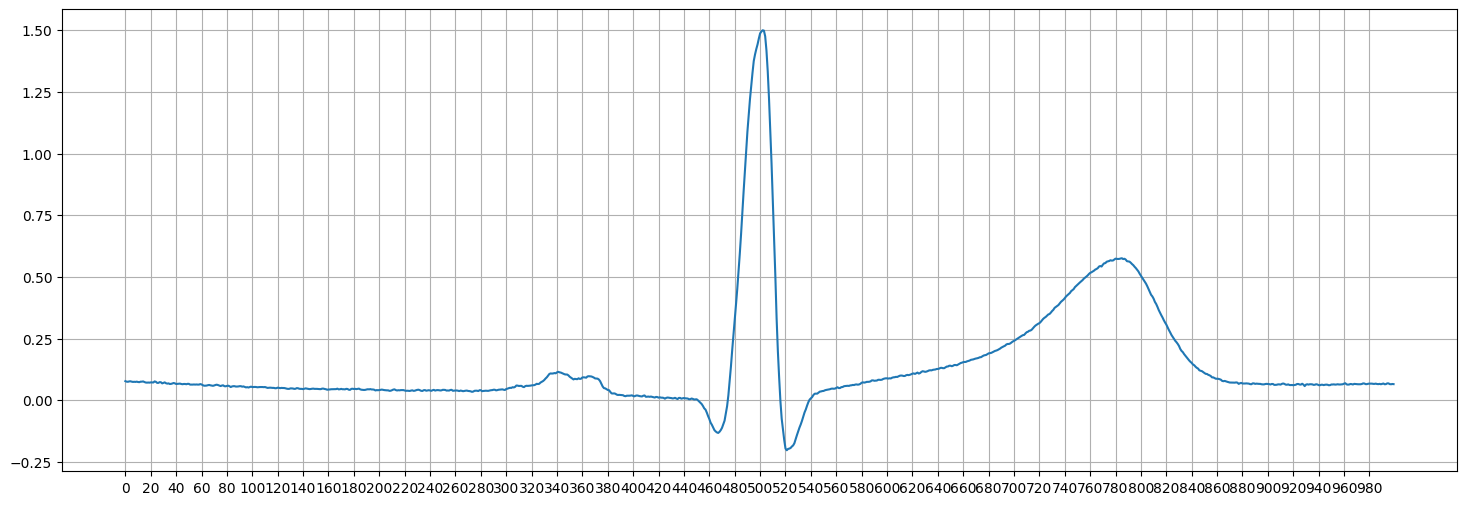

In [ ]:
x = range(len(patient_264))
plt.figure(figsize=(18, 6))
plt.plot(patient_264['vx'])
plt.grid()
plt.xticks(range(0, len(patient_264), 20))

In [ ]:
import plotly.graph_objects as go

# 3D 궤적 생성
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=patient_264['vx'].iloc[180:380],
    y=patient_264['vy'].iloc[180:380],
    z=patient_264['vz'].iloc[180:380],
    mode='lines+markers',
    marker=dict(size=4, color=np.arange(1000), colorscale='Viridis', opacity=0.8),
    line=dict(color='blue', width=2)
))

# 레이아웃 설정
fig.update_layout(
    scene=dict(
        xaxis_title='X-axis (vx)',
        yaxis_title='Y-axis (vy)',
        zaxis_title='Z-axis (vz)'
    ),
    title="P(Atrial Deporalization)"
)

fig.show()

In [ ]:
import plotly.graph_objects as go

# 3D 궤적 생성
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=patient_264['vx'].iloc[380:540],
    y=patient_264['vy'].iloc[380:540],
    z=patient_264['vz'].iloc[380:540],
    mode='lines+markers',
    marker=dict(size=4, color=np.arange(1000), colorscale='Viridis', opacity=0.8),
    line=dict(color='blue', width=2)
))

# 레이아웃 설정
fig.update_layout(
    scene=dict(
        xaxis_title='X-axis (vx)',
        yaxis_title='Y-axis (vy)',
        zaxis_title='Z-axis (vz)'
    ),
    title="QRS(Ventricular Deporarlization)"
)

fig.show()

In [ ]:
import plotly.graph_objects as go

# 3D 궤적 생성
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=patient_264['vx'].iloc[540:1000],
    y=patient_264['vy'].iloc[540:1000],
    z=patient_264['vz'].iloc[540:1000],
    mode='lines+markers',
    marker=dict(size=4, color=np.arange(1000), colorscale='Viridis', opacity=0.8),
    line=dict(color='blue', width=2)
))

# 레이아웃 설정
fig.update_layout(
    scene=dict(
        xaxis_title='X-axis (vx)',
        yaxis_title='Y-axis (vy)',
        zaxis_title='Z-axis (vz)'
    ),
    title="T(ventricular Reporalization)"
)

fig.show()

#104 3 loop

([<matplotlib.axis.XTick at 0x799aef00efd0>,
 [Text(0, 0, '0'),
  Text(20, 0, '20'),
  Text(40, 0, '40'),
  Text(60, 0, '60'),
  Text(80, 0, '80'),
  Text(100, 0, '100'),
  Text(120, 0, '120'),
  Text(140, 0, '140'),
  Text(160, 0, '160'),
  Text(180, 0, '180'),
  Text(200, 0, '200'),
  Text(220, 0, '220'),
  Text(240, 0, '240'),
  Text(260, 0, '260'),
  Text(280, 0, '280'),
  Text(300, 0, '300'),
  Text(320, 0, '320'),
  Text(340, 0, '340'),
  Text(360, 0, '360'),
  Text(380, 0, '380'),
  Text(400, 0, '400'),
  Text(420, 0, '420'),
  Text(440, 0, '440'),
  Text(460, 0, '460'),
  Text(480, 0, '480'),
  Text(500, 0, '500'),
  Text(520, 0, '520'),
  Text(540, 0, '540'),
  Text(560, 0, '560'),
  Text(580, 0, '580'),
  Text(600, 0, '600'),
  Text(620, 0, '620'),
  Text(640, 0, '640'),
  Text(660, 0, '660'),
  Text(680, 0, '680'),
  Text(700, 0, '700'),
  Text(720, 0, '720'),
  Text(740, 0, '740'),
  Text(760, 0, '760'),
  Text(780, 0, '780')])

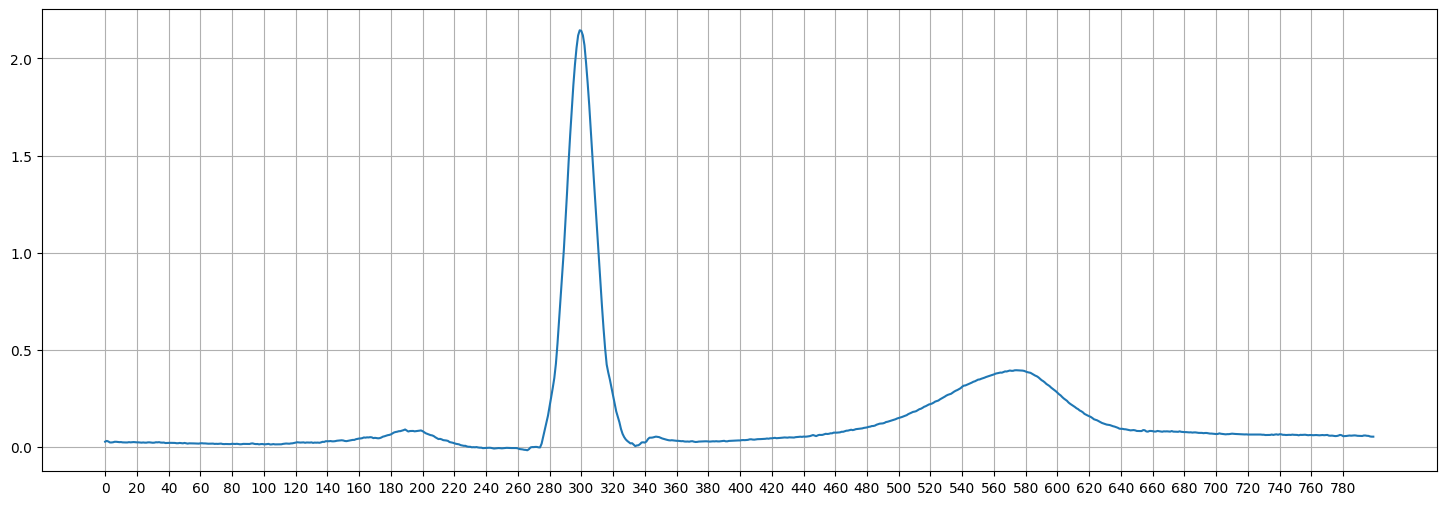

In [ ]:
x = range(len(patient_104))
plt.figure(figsize=(18, 6))
plt.plot(patient_104['vx'])
plt.grid()
plt.xticks(range(0, len(patient_104), 20))

In [ ]:
import plotly.graph_objects as go

# 3D 궤적 생성
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=patient_104['vx'].iloc[0:240],
    y=patient_104['vy'].iloc[0:240],
    z=patient_104['vz'].iloc[0:240],
    mode='lines+markers',
    marker=dict(size=4, color=np.arange(1000), colorscale='Viridis', opacity=0.8),
    line=dict(color='blue', width=2)
))

# 레이아웃 설정
fig.update_layout(
    scene=dict(
        xaxis_title='X-axis (vx)',
        yaxis_title='Y-axis (vy)',
        zaxis_title='Z-axis (vz)'
    ),
    title="Patient_104 P(Atrial Deporalization)"
)

fig.show()

In [ ]:
import plotly.graph_objects as go

# 3D 궤적 생성
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=patient_104['vx'].iloc[240:380],
    y=patient_104['vy'].iloc[240:380],
    z=patient_104['vz'].iloc[240:380],
    mode='lines+markers',
    marker=dict(size=4, color=np.arange(1000), colorscale='Viridis', opacity=0.8),
    line=dict(color='blue', width=2)
))

# 레이아웃 설정
fig.update_layout(
    scene=dict(
        xaxis_title='X-axis (vx)',
        yaxis_title='Y-axis (vy)',
        zaxis_title='Z-axis (vz)'
    ),
    title="Patient_104 QRS(Ventricular Deporarlization)"
)

fig.show()

In [ ]:
import plotly.graph_objects as go

# 3D 궤적 생성
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=patient_104['vx'].iloc[380:800],
    y=patient_104['vy'].iloc[380:800],
    z=patient_104['vz'].iloc[380:800],
    mode='lines+markers',
    marker=dict(size=4, color=np.arange(1000), colorscale='Viridis', opacity=0.8),
    line=dict(color='blue', width=2)
))

# 레이아웃 설정
fig.update_layout(
    scene=dict(
        xaxis_title='X-axis (vx)',
        yaxis_title='Y-axis (vy)',
        zaxis_title='Z-axis (vz)'
    ),
    title="Patient_104 T(ventricular Reporalization)"
)

fig.show()

#Torso Model

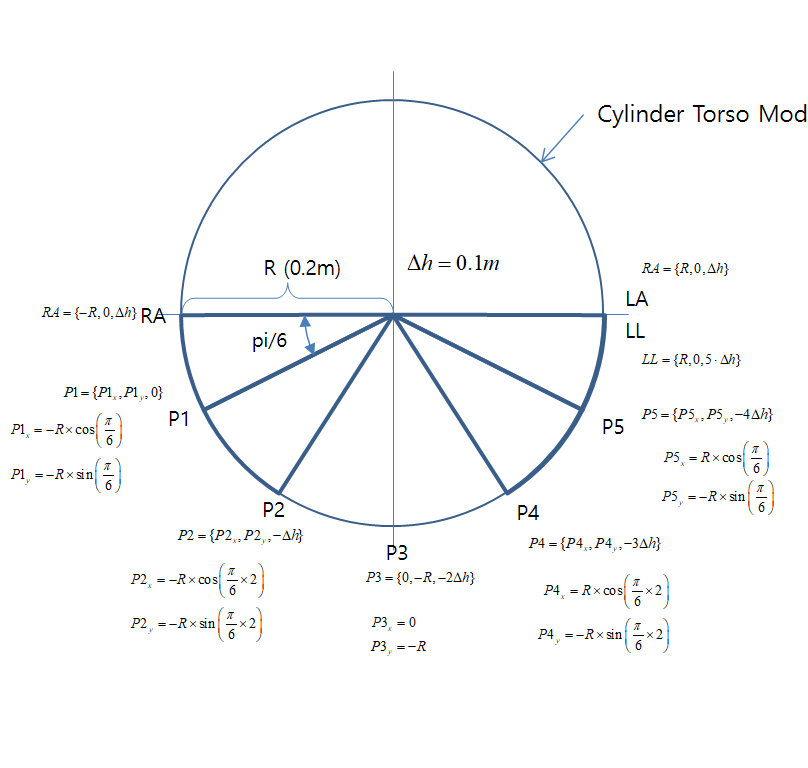

In [ ]:
pip install plotly

In [ ]:
import numpy as np
import plotly.graph_objects as go

# 타원형 반지름
a = 0.18  # x 방향 반지름
b = 0.25   # y 방향 반지름
height = 0.46

theta = np.linspace(0, 2*np.pi, 100)
z = np.linspace(0, height, 50)
theta, z = np.meshgrid(theta, z)

# 타원형 좌표
x = a * np.cos(theta)
y = b * np.sin(theta)

# Plotly를 사용한 3D 플롯
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z, colorscale='Blues', opacity=0.5)])
fig.update_layout(title='Interactive Elliptical Cylinder with Grid', scene=dict(
                    xaxis=dict(title='X', showgrid=True),
                    yaxis=dict(title='Y', showgrid=True),
                    zaxis=dict(title='Z', showgrid=True)))
fig.show()

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

result = pd.read_csv('/content/drive/MyDrive/result2.csv')
result = result*(1/10) # scale 조정 위함
a = 0.18
b = 0.15
height = 0.46

theta = np.linspace(0, 2*np.pi, 100)
z = np.linspace(-0.31, 0.15, 50)  # 시작 위치 -31cm, 끝 위치 15cm

theta, z = np.meshgrid(theta, z)

x = a * np.cos(theta)
y = b * np.sin(theta)

fig = go.Figure()

# 첫 번째 그래프
fig.add_trace(go.Surface(x=x, y=y, z=z, colorscale='Blues', opacity=0.5))

# RA
RA_x = -a
RA_y = 0

fig.add_trace(go.Scatter3d(
    x=[RA_x],
    y=[RA_y],
    z=[0.02],
    mode='markers+text',
    marker=dict(color='orange', size=4),
    text=['RA'],
    textposition='top center',
    name='Point'
))

# LL
LL_x = a
LL_y = 0

fig.add_trace(go.Scatter3d(
    x=[LL_x],
    y=[LL_y],
    z=[0.02 * -5],
    mode='markers+text',
    marker=dict(color='orange', size=4),
    text=['LL'],
    textposition='top center',
    name='Point'
))

# LA
LA_x = a
LA_y = 0

fig.add_trace(go.Scatter3d(
    x=[LA_x],
    y=[LA_y],
    z=[0.02],
    mode='markers+text',
    marker=dict(color='orange', size=4),
    text=['LA'],
    textposition='top center',
    name='Point'
))

# RA to LL
fig.add_trace(go.Scatter3d(
    x=[RA_x, LL_x],
    y=[RA_y, LL_y],
    z=[0.02, 0.02 * -5],
    mode='lines',
    line=dict(color='purple', width=3),
    name='RA to LL'
))

# 중간 지점 계산
mid_x = (RA_x + LL_x) / 2
mid_y = (RA_y + LL_y) / 2
mid_z = (0.02 + 0.02 * -5) / 2

# 중간 지점에 +z 방향으로 수직선 추가
fig.add_trace(go.Scatter3d(
    x=[mid_x, mid_x],
    y=[mid_y, mid_y],
    z=[mid_z, mid_z + 0.3],
    mode='lines',
    line=dict(color='red', width=3),
    name='Perpendicular at Midpoint'
))

# 두 번째 그래프
fig.add_trace(go.Scatter3d(
    x=result['vx_sum'] ,
    y=result['vy_sum'] ,
    z=result['vz_sum'] ,
    mode='lines+markers',
    marker=dict(size=4, color=np.arange(1000), colorscale='Viridis', opacity=0.8),
    line=dict(color='blue', width=2)
))

# 레이아웃 설정
fig.update_layout(
    title='Interactive Elliptical Cylinder with Square, Line, and Point',
    scene=dict(
        xaxis=dict(title='X (m)', showgrid=True),
        yaxis=dict(title='Y (m)', showgrid=True),
        zaxis=dict(title='Z (m)', showgrid=True)
    )
)

fig.show()


In [ ]:
import pandas as pd
import numpy as np

data_ii = pd.read_csv("/content/drive/MyDrive/result2.csv")

RA = np.array([-0.18, 0, 0.02])
LL = np.array([0.18, 0, -0.1])
omega_0 = 2.38
LL_minus_RA = np.array([0.36, 0, -0.12])

ii_results = []

for _, row in data_ii.iterrows(): #행 마다 계산 반복
    P = np.array([row['vx_sum'], row['vy_sum'], row['vz_sum']])

    r1 = P - RA
    r2 = P - LL

    r_diff_x = r2[0] - r1[0]
    r_diff_y = r2[1] - r1[1]
    r_diff_z = r2[2] - r1[2]

    # 벡터 크기 계산
    r_diff_norm = np.sqrt(r_diff_x**2 + r_diff_y**2 + r_diff_z**2)
    numerator = (P[0] * LL_minus_RA[0]) + (P[1] * LL_minus_RA[1]) + (P[2] * LL_minus_RA[2])
    denominator = 4 * np.pi * omega_0 * (r_diff_norm ** 3)
    lead_ii = numerator / denominator if denominator != 0 else 0  # 0으로 나누는 경우 방지


    ii_result = lead_ii * (1 - (-1))  # (1, 0, -1)과 내적
    ii_results.append(ii_result)


data_ii['ii_result'] = ii_results


data_ii.to_csv("lead2_cal.csv", index=False)


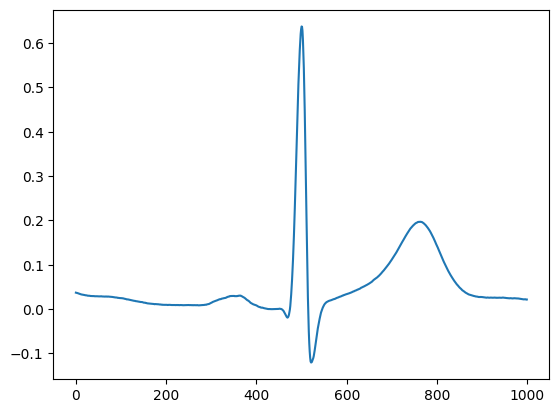

In [ ]:
plt.plot(data_ii['ii_result'])

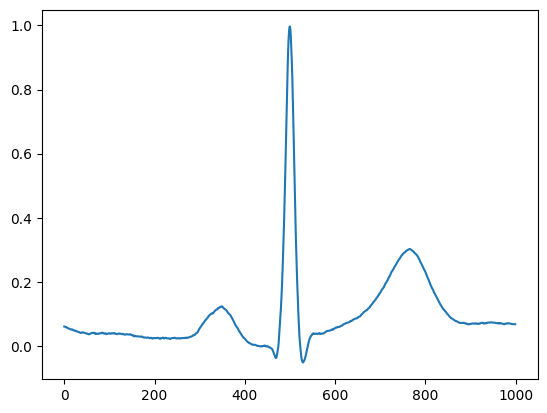

In [ ]:
plt.plot(data_ii['ii_sum'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

scaler = StandardScaler()
x_scaled = scaler.fit_transform(data_ii['ii_result'].values.reshape(-1, 1)).flatten() #열벡터 변환 후 1차원flatten 배열
y_scaled = scaler.fit_transform(data_ii['ii_sum'].values.reshape(-1, 1)).flatten()

pearson_corr, p_value = pearsonr(x_scaled, y_scaled)

print("표준화 상관계수(r):", pearson_corr)
print("p-value:", p_value)

표준화 상관계수(r): 0.970373795219143
p-value: 0.0


In [ ]:
import pandas as pd
import numpy as np

data_i = pd.read_csv("/content/drive/MyDrive/result2.csv")

RA = np.array([-0.18, 0, 0.02])
LA = np.array([0.18, 0, 0.02])
omega_0 = 2.38
LA_minus_RA = LA-RA

i_results = []

for _, row in data_i.iterrows(): #행 마다 계산 반복
    P = np.array([row['vx_sum'], row['vy_sum'], row['vz_sum']])

    r1 = P - RA
    r2 = P - LA

    r_diff_x = r2[0] - r1[0]
    r_diff_y = r2[1] - r1[1]
    r_diff_z = r2[2] - r1[2]

    # 벡터 크기 계산
    r_diff_norm = np.sqrt(r_diff_x**2 + r_diff_y**2 + r_diff_z**2)
    numerator = (P[0] * LA_minus_RA[0]) + (P[1] * LA_minus_RA[1]) + (P[2] * LA_minus_RA[2])
    denominator = 4 * np.pi * omega_0 * (r_diff_norm ** 3)
    lead_i = numerator / denominator if denominator != 0 else 0  # 0으로 나누는 경우 방지


    i_result = lead_i * (1 - (-1))  # (1, 0, -1)과 내적
    i_results.append(i_result)


data_i['i_result'] = i_results


data_i.to_csv("lead1_cal.csv", index=False)


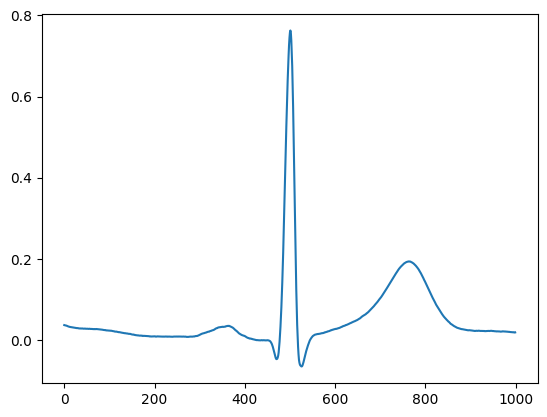

In [ ]:
plt.plot(data_i['i_result'])

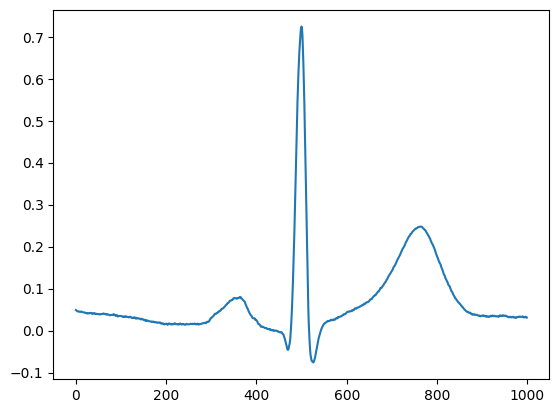

In [ ]:
plt.plot(data_i['i_sum'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

scaler = StandardScaler()
x_scaled = scaler.fit_transform(data_i['i_result'].values.reshape(-1, 1)).flatten() #열벡터 변환 후 1차원flatten 배열
y_scaled = scaler.fit_transform(data_i['i_sum'].values.reshape(-1, 1)).flatten()

pearson_corr, p_value = pearsonr(x_scaled, y_scaled)

print("표준화 상관계수(r):", pearson_corr)
print("p-value:", p_value)

표준화 상관계수(r): 0.9847320414476423
p-value: 0.0


In [ ]:
import pandas as pd
import numpy as np

data_iii = pd.read_csv("/content/drive/MyDrive/result2.csv")

LL = np.array([0.18, 0, -0.1])
LA = np.array([0.18, 0, 0.02])
omega_0 = 2.38
LL_minus_LA = LL-LA

iii_results = []

for _, row in data_iii.iterrows(): #행 마다 계산 반복
    P = np.array([row['vx_sum'], row['vy_sum'], row['vz_sum']])

    r1 = P - LA
    r2 = P - LL

    r_diff_x = r2[0] - r1[0]
    r_diff_y = r2[1] - r1[1]
    r_diff_z = r2[2] - r1[2]

    # 벡터 크기 계산
    r_diff_norm = np.sqrt(r_diff_x**2 + r_diff_y**2 + r_diff_z**2)
    numerator = (P[0] * LL_minus_LA[0]) + (P[1] * LL_minus_LA[1]) + (P[2] * LL_minus_LA[2])
    denominator = 4 * np.pi * omega_0 * (r_diff_norm ** 3)
    lead_iii = numerator / denominator if denominator != 0 else 0  # 0으로 나누는 경우 방지


    iii_result = lead_iii * (1 - (-1))  # (1, 0, -1)과 내적
    iii_results.append(iii_result)


data_iii['iii_result'] = iii_results


data_iii.to_csv("lead3_cal.csv", index=False)


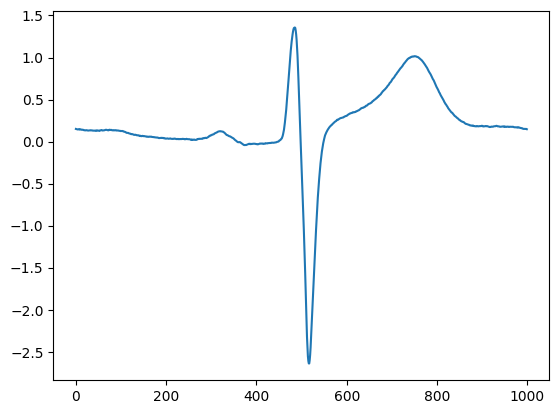

In [ ]:
plt.plot(data_iii['iii_result'])

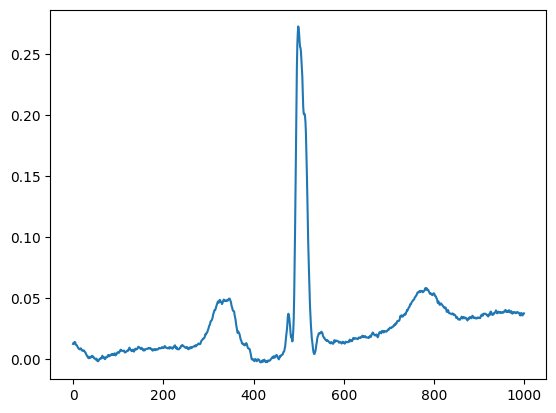

In [ ]:
plt.plot(data_iii['iii_sum'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

scaler = StandardScaler()
x_scaled = scaler.fit_transform(data_iii['iii_result'].values.reshape(-1, 1)).flatten() #열벡터 변환 후 1차원flatten 배열
y_scaled = scaler.fit_transform(data_iii['iii_sum'].values.reshape(-1, 1)).flatten()

pearson_corr, p_value = pearsonr(x_scaled, y_scaled)

print("표준화 상관계수(r):", pearson_corr)
print("p-value:", p_value)

표준화 상관계수(r): -0.2811731224933297
p-value: 1.2595152997902083e-19


#Patient Data correltion

In [ ]:
Data1= {
    1:
    pd.read_csv('/content/drive/MyDrive/Healthy/104/s0306lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    2:
    pd.read_csv('/content/drive/MyDrive/Healthy/105/s0303lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    3:
    pd.read_csv('/content/drive/MyDrive/Healthy/116/s0302lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[1000:4000,:],
    4:
    pd.read_csv('/content/drive/MyDrive/Healthy/117/s0292lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    5:
    pd.read_csv('/content/drive/MyDrive/Healthy/121/s0311lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    6:
    pd.read_csv('/content/drive/MyDrive/Healthy/122/s0312lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    7:
    pd.read_csv('/content/drive/MyDrive/Healthy/131/s0273lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    8:
    pd.read_csv('/content/drive/MyDrive/Healthy/150/s0287lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[1000:4000,:],
    9:
    pd.read_csv('/content/drive/MyDrive/Healthy/155/s0301lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[1000:4000,:],
    10:
    pd.read_csv('/content/drive/MyDrive/Healthy/156/s0299lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[1000:4000,:],
    11:
    pd.read_csv('/content/drive/MyDrive/Healthy/165/s0323lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    12:
    pd.read_csv('/content/drive/MyDrive/Healthy/166/s0275lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[1000:4000,:],
    13:
    pd.read_csv('/content/drive/MyDrive/Healthy/169/s0329lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[9000:12000,:],
    14:
    pd.read_csv('/content/drive/MyDrive/Healthy/170/s0274lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    15:
    pd.read_csv('/content/drive/MyDrive/Healthy/172/s0304lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    16:
    pd.read_csv('/content/drive/MyDrive/Healthy/173/s0305lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    17:
    pd.read_csv('/content/drive/MyDrive/Healthy/174/s0300lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    18:
    pd.read_csv('/content/drive/MyDrive/Healthy/180/s0475_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    19:
    pd.read_csv('/content/drive/MyDrive/Healthy/182/s0308lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[1000:4000,:],
    20:
    pd.read_csv('/content/drive/MyDrive/Healthy/184/s0363lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    21:
    pd.read_csv('/content/drive/MyDrive/Healthy/185/s0336lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[16000:19000,:],
    22:
    pd.read_csv('/content/drive/MyDrive/Healthy/198/s0415lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    23:
    pd.read_csv('/content/drive/MyDrive/Healthy/214/s0436_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    24:
    pd.read_csv('/content/drive/MyDrive/Healthy/229/s0452_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    25:
    pd.read_csv('/content/drive/MyDrive/Healthy/233/s0483_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    26:
    pd.read_csv('/content/drive/MyDrive/Healthy/234/s0460_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    27:
    pd.read_csv('/content/drive/MyDrive/Healthy/235/s0461_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    28:
    pd.read_csv('/content/drive/MyDrive/Healthy/236/s0463_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    29:
    pd.read_csv('/content/drive/MyDrive/Healthy/237/s0465_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    30:
    pd.read_csv('/content/drive/MyDrive/Healthy/238/s0466_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    31:
    pd.read_csv('/content/drive/MyDrive/Healthy/239/s0467_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    32:
    pd.read_csv('/content/drive/MyDrive/Healthy/240/s0468_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[2000:5000,:],
    33:
    pd.read_csv('/content/drive/MyDrive/Healthy/241/s0469_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    34:
    pd.read_csv('/content/drive/MyDrive/Healthy/242/s0471_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[2000:5000,:],
    35:
    pd.read_csv('/content/drive/MyDrive/Healthy/243/s0472_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    36:
    pd.read_csv('/content/drive/MyDrive/Healthy/244/s0473_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    37:
    pd.read_csv('/content/drive/MyDrive/Healthy/245/s0480_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    38:
    pd.read_csv('/content/drive/MyDrive/Healthy/246/s0478_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[11000:14000,:],
    39:
    pd.read_csv('/content/drive/MyDrive/Healthy/247/s0479_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    40:
    pd.read_csv('/content/drive/MyDrive/Healthy/248/s0481_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[5000:8000,:],
    41:
    pd.read_csv('/content/drive/MyDrive/Healthy/251/s0503_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    42:
    pd.read_csv('/content/drive/MyDrive/Healthy/252/s0487_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[26000:29000,:],
    43:
    pd.read_csv('/content/drive/MyDrive/Healthy/255/s0491_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[4000:7000,:],
    44:
    pd.read_csv('/content/drive/MyDrive/Healthy/260/s0496_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    45:
    pd.read_csv('/content/drive/MyDrive/Healthy/263/s0499_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    46:
    pd.read_csv('/content/drive/MyDrive/Healthy/264/s0500_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    47:
    pd.read_csv('/content/drive/MyDrive/Healthy/266/s0502_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    48:
    pd.read_csv('/content/drive/MyDrive/Healthy/267/s0504_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    49:
    pd.read_csv('/content/drive/MyDrive/Healthy/276/s0526_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[4000:7000,:],
    50:
    pd.read_csv('/content/drive/MyDrive/Healthy/277/s0527_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[1000:4000,:],
    51:
    pd.read_csv('/content/drive/MyDrive/Healthy/279/s0531_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[1000:4000,:],
    52:
    pd.read_csv('/content/drive/MyDrive/Healthy/284/s0552_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[1000:4000,:]}

In [ ]:
data1={}

def data1_set():
  for i in range (1,53):
    data1[i]= pd.DataFrame(Data1[i],columns = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz'], dtype = float).reset_index(drop=True)

data1_set()

In [ ]:
filter1={}

def HP_filter1():
  sos1 = signal.butter(2, 0.1, 'high', fs=1000, output='sos')
  for a in range(1,53):
    filter1[a]= pd.DataFrame(signal.sosfilt(sos1, data1[a]),columns = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz'], dtype = float)

HP_filter1()

In [ ]:
D1={
    1:filter1[1].iloc[1202:2202,:].reset_index(drop=True),
    2:filter1[3].iloc[650:1650,:].reset_index(drop=True),
    3:filter1[4].iloc[1033:2033,:].reset_index(drop=True),
    4:filter1[5].iloc[665:1665,:].reset_index(drop=True),
    5:filter1[6].iloc[1153:2153,:].reset_index(drop=True),
    6:filter1[7].iloc[1121:2121,:].reset_index(drop=True),
    7:filter1[8].iloc[715:1715,:].reset_index(drop=True),
    8:filter1[9].iloc[825:1825,:].reset_index(drop=True),
    9:filter1[11].iloc[1406:2406,:].reset_index(drop=True),
    10:filter1[12].iloc[1190:2190,:].reset_index(drop=True),
    11:filter1[14].iloc[1221:2221,:].reset_index(drop=True),
    12:filter1[15].iloc[1002:2002,:].reset_index(drop=True),
    13:filter1[17].iloc[862:1862,:].reset_index(drop=True),
    14:filter1[19].iloc[619:1619,:].reset_index(drop=True),
    15:filter1[25].iloc[1174:2174,:].reset_index(drop=True),
    16:filter1[27].iloc[964:1964,:].reset_index(drop=True),
    17:filter1[28].iloc[878:1878,:].reset_index(drop=True),
    18:filter1[29].iloc[728:1728,:].reset_index(drop=True),
    19:filter1[30].iloc[1587:2587,:].reset_index(drop=True),
    20:filter1[36].iloc[790:1790,:].reset_index(drop=True),
    21:filter1[37].iloc[1114:2114,:].reset_index(drop=True),
    22:filter1[38].iloc[896:1896,:].reset_index(drop=True),
    23:filter1[39].iloc[756:1756,:].reset_index(drop=True),
    24:filter1[40].iloc[1087:2087,:].reset_index(drop=True),
    25:filter1[42].iloc[1289:2289,:].reset_index(drop=True),
    26:filter1[46].iloc[937:1937,:].reset_index(drop=True),
    27:filter1[48].iloc[1225:2225,:].reset_index(drop=True),
    28:filter1[49].iloc[1248:2248,:].reset_index(drop=True),
    29:filter1[50].iloc[958:1958,:].reset_index(drop=True),
    30:filter1[51].iloc[842:1842,:].reset_index(drop=True),
    31:filter1[52].iloc[925:1925,:].reset_index(drop=True)
}

In [ ]:
Set = {}  # 모든 데이터를 저장할 딕셔너리

for a in range(1, 32):  # 1일부터 31일까지 데이터 처리
    # 각 리드 데이터 가져오기
    vcg_signal_i = D1[a]['i']
    vcg_signal_ii = D1[a]['ii']
    vcg_signal_iii = D1[a]['iii']
    vcg_signal_avl = D1[a]['avl']
    vcg_signal_avr = D1[a]['avr']
    vcg_signal_avf = D1[a]['avf']
    vcg_signal_v1 = D1[a]['v1']
    vcg_signal_v2 = D1[a]['v2']
    vcg_signal_v3 = D1[a]['v3']
    vcg_signal_v4 = D1[a]['v4']
    vcg_signal_v5 = D1[a]['v5']
    vcg_signal_v6 = D1[a]['v6']

    # VCG 데이터 가져오기
    vcg_signal_vx = D1[a]['vx']
    vcg_signal_vy = D1[a]['vy']
    vcg_signal_vz = D1[a]['vz']

    # PR 세그먼트 구간 설정
    pr_start = 420
    pr_end = 460

    # PR 세그먼트 평균 계산
    pr_segment_mean_i = np.mean(vcg_signal_i[pr_start:pr_end])
    pr_segment_mean_ii = np.mean(vcg_signal_ii[pr_start:pr_end])
    pr_segment_mean_iii = np.mean(vcg_signal_iii[pr_start:pr_end])
    pr_segment_mean_avl = np.mean(vcg_signal_avl[pr_start:pr_end])
    pr_segment_mean_avr = np.mean(vcg_signal_avr[pr_start:pr_end])
    pr_segment_mean_avf = np.mean(vcg_signal_avf[pr_start:pr_end])
    pr_segment_mean_v1 = np.mean(vcg_signal_v1[pr_start:pr_end])
    pr_segment_mean_v2 = np.mean(vcg_signal_v2[pr_start:pr_end])
    pr_segment_mean_v3 = np.mean(vcg_signal_v3[pr_start:pr_end])
    pr_segment_mean_v4 = np.mean(vcg_signal_v4[pr_start:pr_end])
    pr_segment_mean_v5 = np.mean(vcg_signal_v5[pr_start:pr_end])
    pr_segment_mean_v6 = np.mean(vcg_signal_v6[pr_start:pr_end])
    pr_segment_mean_vx = np.mean(vcg_signal_vx[pr_start:pr_end])
    pr_segment_mean_vy = np.mean(vcg_signal_vy[pr_start:pr_end])
    pr_segment_mean_vz = np.mean(vcg_signal_vz[pr_start:pr_end])

    # 오프셋 제거
    i_ = vcg_signal_i - pr_segment_mean_i
    ii_ = vcg_signal_ii - pr_segment_mean_ii
    iii_ = vcg_signal_iii - pr_segment_mean_iii
    avl_ = vcg_signal_avl - pr_segment_mean_avl
    avr_ = vcg_signal_avr - pr_segment_mean_avr
    avf_ = vcg_signal_avf - pr_segment_mean_avf
    v1_ = vcg_signal_v1 - pr_segment_mean_v1
    v2_ = vcg_signal_v2 - pr_segment_mean_v2
    v3_ = vcg_signal_v3 - pr_segment_mean_v3
    v4_ = vcg_signal_v4 - pr_segment_mean_v4
    v5_ = vcg_signal_v5 - pr_segment_mean_v5
    v6_ = vcg_signal_v6 - pr_segment_mean_v6
    vx_ = vcg_signal_vx - pr_segment_mean_vx
    vy_ = vcg_signal_vy - pr_segment_mean_vy
    vz_ = vcg_signal_vz - pr_segment_mean_vz

    # 결과를 DataFrame으로 저장
    Set[a] = pd.DataFrame({
        'i': i_,
        'ii': ii_,
        'iii': iii_,
        'avr': avr_,
        'avl': avl_,
        'avf': avf_,
        'v1': v1_,
        'v2': v2_,
        'v3': v3_,
        'v4': v4_,
        'v5': v5_,
        'v6': v6_,
        'vx': vx_,
        'vy': vy_,
        'vz': vz_
    })

# fin

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import pandas as pd
import numpy as np

# 초기 변수 설정
data = {}
RA = np.array([-0.18, 0, 0.02])
LL = np.array([0.18, 0, -0.1])
LA = np.array([0.18, 0, 0.02])
omega_0 = 2.38
LL_minus_LA = LL - LA
LA_minus_RA = LA - RA
LL_minus_RA = LL - RA

for a in range (1,31):
# 데이터프레임 생성
  vcg_vx = Set[a].loc[:, 'vx']
  vcg_vy = Set[a].loc[:, 'vy']
  vcg_vz = Set[a].loc[:, 'vz']
  i_results = []
  ii_results = []
  iii_results = []
  lead2_minus_lead1 = []

  data[a] = pd.DataFrame({
    'vx': vcg_vx,
    'vy': vcg_vy,
    'vz': vcg_vz
  })

  # 반복문을 통한 계산
  for _, row in data[a].iterrows():  # 행 마다 계산 반복
      P = np.array([row['vx'], row['vy'], row['vz']])

    # lead 1
      r1 = P - RA
      r2 = P - LL

      r_diff_x = r2[0] - r1[0]
      r_diff_y = r2[1] - r1[1]
      r_diff_z = r2[2] - r1[2]

    # 벡터 크기 계산
      r_diff_norm = np.sqrt(r_diff_x**2 + r_diff_y**2 + r_diff_z**2)
      numerator = (P[0] * LA_minus_RA[0]) + (P[1] * LA_minus_RA[1]) + (P[2] * LA_minus_RA[2])
      denominator = 4 * np.pi * omega_0 * (r_diff_norm ** 3)
      lead_i = numerator / denominator if denominator != 0 else 0  # 0으로 나누는 경우 방지

      i_result = lead_i * (1 - (-1))  # (1, 0, -1)과 내적
      i_results.append(i_result)

    # lead 2
      r1 = P - RA
      r2 = P - LA

      r_diff_x = r2[0] - r1[0]
      r_diff_y = r2[1] - r1[1]
      r_diff_z = r2[2] - r1[2]

    # 벡터 크기 계산
      r_diff_norm = np.sqrt(r_diff_x**2 + r_diff_y**2 + r_diff_z**2)
      numerator = (P[0] * LL_minus_RA[0]) + (P[1] * LL_minus_RA[1]) + (P[2] * LL_minus_RA[2])
      denominator = 4 * np.pi * omega_0 * (r_diff_norm ** 3)
      lead_ii = numerator / denominator if denominator != 0 else 0  # 0으로 나누는 경우 방지

      ii_result = lead_ii * (1 - (-1))  # (1, 0, -1)과 내적
      ii_results.append(ii_result)

    # lead 3
      r1 = P - LA
      r2 = P - LL

      r_diff_x = r2[0] - r1[0]
      r_diff_y = r2[1] - r1[1]
      r_diff_z = r2[2] - r1[2]

    # 벡터 크기 계산
      r_diff_norm = np.sqrt(r_diff_x**2 + r_diff_y**2 + r_diff_z**2)
      numerator = (P[0] * LL_minus_LA[0]) + (P[1] * LL_minus_LA[1]) + (P[2] * LL_minus_LA[2])
      denominator = 4 * np.pi * omega_0 * (r_diff_norm ** 3)
      lead_iii = numerator / denominator if denominator != 0 else 0  # 0으로 나누는 경우 방지

      iii_result = lead_iii * (1 - (-1))  # (1, 0, -1)과 내적
      iii_results.append(iii_result)

# 결과를 데이터프레임에 추가
  data[a]['i_result'] = i_results
  data[a]['ii_result'] = ii_results
  data[a]['iii_result'] = iii_results
  data[a]['lead2_minus_lead1'] = data[a]['ii_result'] - data[a]['i_result']

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import pandas as pd

scaler = StandardScaler()

correlation_results_i = pd.DataFrame(columns=['pearson_corr', 'p_value'])
correlation_results_ii = pd.DataFrame(columns=['pearson_corr', 'p_value'])
correlation_results_iii = pd.DataFrame(columns=['pearson_corr', 'p_value'])
correlation_results_lead2_minus_lead1 = pd.DataFrame(columns=['pearson_corr', 'p_value'])

for a in range(1, 31):
    # lead i
    x_scaled = scaler.fit_transform(data[a]['i_result'].values.reshape(-1, 1)).flatten()
    y_scaled = scaler.fit_transform(Set[a]['i'].values.reshape(-1, 1)).flatten()
    pearson_corr, p_value = pearsonr(x_scaled, y_scaled)
    correlation_results_i.loc[a] = [pearson_corr, p_value]

    # lead ii
    x_scaled = scaler.fit_transform(data[a]['ii_result'].values.reshape(-1, 1)).flatten()
    y_scaled = scaler.fit_transform(Set[a]['ii'].values.reshape(-1, 1)).flatten()
    pearson_corr, p_value = pearsonr(x_scaled, y_scaled)
    correlation_results_ii.loc[a] = [pearson_corr, p_value]

    # lead iii
    x_scaled = scaler.fit_transform(data[a]['iii_result'].values.reshape(-1, 1)).flatten()
    y_scaled = scaler.fit_transform(Set[a]['iii'].values.reshape(-1, 1)).flatten()
    pearson_corr, p_value = pearsonr(x_scaled, y_scaled)
    correlation_results_iii.loc[a] = [pearson_corr, p_value]

    # lead iii(lead2_minus_lead1)
    x_scaled = scaler.fit_transform(data[a]['lead2_minus_lead1'].values.reshape(-1, 1)).flatten()
    y_scaled = scaler.fit_transform(Set[a]['iii'].values.reshape(-1, 1)).flatten()
    pearson_corr, p_value = pearsonr(x_scaled, y_scaled)
    correlation_results_lead2_minus_lead1.loc[a] = [pearson_corr, p_value]

# 결과 출력
print("Correlation Results for Lead I:")
print(correlation_results_i)
print("Correlation mean Lead I:")
print(np.mean(correlation_results_i['pearson_corr']))
print("\nCorrelation Results for Lead II:")
print(correlation_results_ii)
print("Correlation mean Lead II:")
print(np.mean(correlation_results_ii['pearson_corr']))
print("\nCorrelation Results for Lead III:")
print(correlation_results_iii)
print("Correlation mean Lead III:")
print(np.mean(correlation_results_iii['pearson_corr']))
print("\nCorrelation Results for lead2_minus_lead1:")
print(correlation_results_lead2_minus_lead1)
print("Correlation mean lead2_minus_lead1:")
print(np.mean(correlation_results_lead2_minus_lead1['pearson_corr']))

Correlation Results for Lead I:
    pearson_corr        p_value
1       0.976078   0.000000e+00
2       0.749287  8.026330e-181
3       0.971702   0.000000e+00
4       0.986983   0.000000e+00
5       0.781179  2.072705e-206
6       0.970434   0.000000e+00
7       0.951317   0.000000e+00
8       0.954982   0.000000e+00
9       0.961591   0.000000e+00
10      0.949076   0.000000e+00
11      0.974432   0.000000e+00
12      0.824679  3.099338e-249
13      0.846816  6.939315e-276
14      0.985754   0.000000e+00
15      0.710381  2.066837e-154
16      0.983573   0.000000e+00
17      0.964627   0.000000e+00
18      0.988780   0.000000e+00
19      0.968072   0.000000e+00
20      0.992898   0.000000e+00
21      0.953317   0.000000e+00
22      0.985882   0.000000e+00
23      0.920317   0.000000e+00
24      0.995708   0.000000e+00
25      0.984935   0.000000e+00
26      0.965770   0.000000e+00
27      0.992878   0.000000e+00
28      0.967688   0.000000e+00
29      0.961505   0.000000e+00
30      

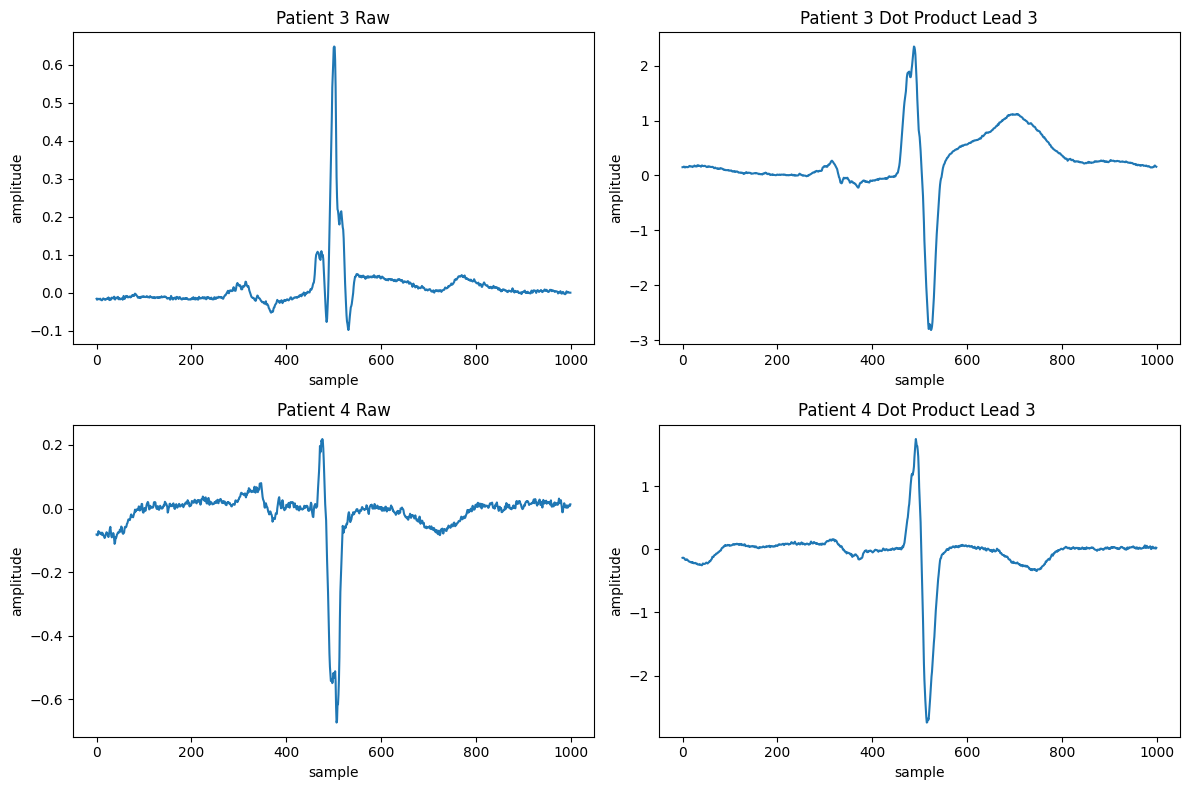

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(Set[3]['iii'])
plt.title('Patient 3 Raw')
plt.xlabel('sample')
plt.ylabel('amplitude')

plt.subplot(2, 2, 2)
plt.plot(data[3]['iii_result'])
plt.title('Patient 3 Dot Product Lead 3')
plt.xlabel('sample')
plt.ylabel('amplitude')

plt.subplot(2, 2, 3)
plt.plot(Set[4]['iii'])
plt.title('Patient 4 Raw')
plt.xlabel('sample')
plt.ylabel('amplitude')

plt.subplot(2, 2, 4)
plt.plot(data[4]['iii_result'])
plt.title('Patient 4 Dot Product Lead 3 ')
plt.xlabel('sample')
plt.ylabel('amplitude')

plt.tight_layout()
plt.show()

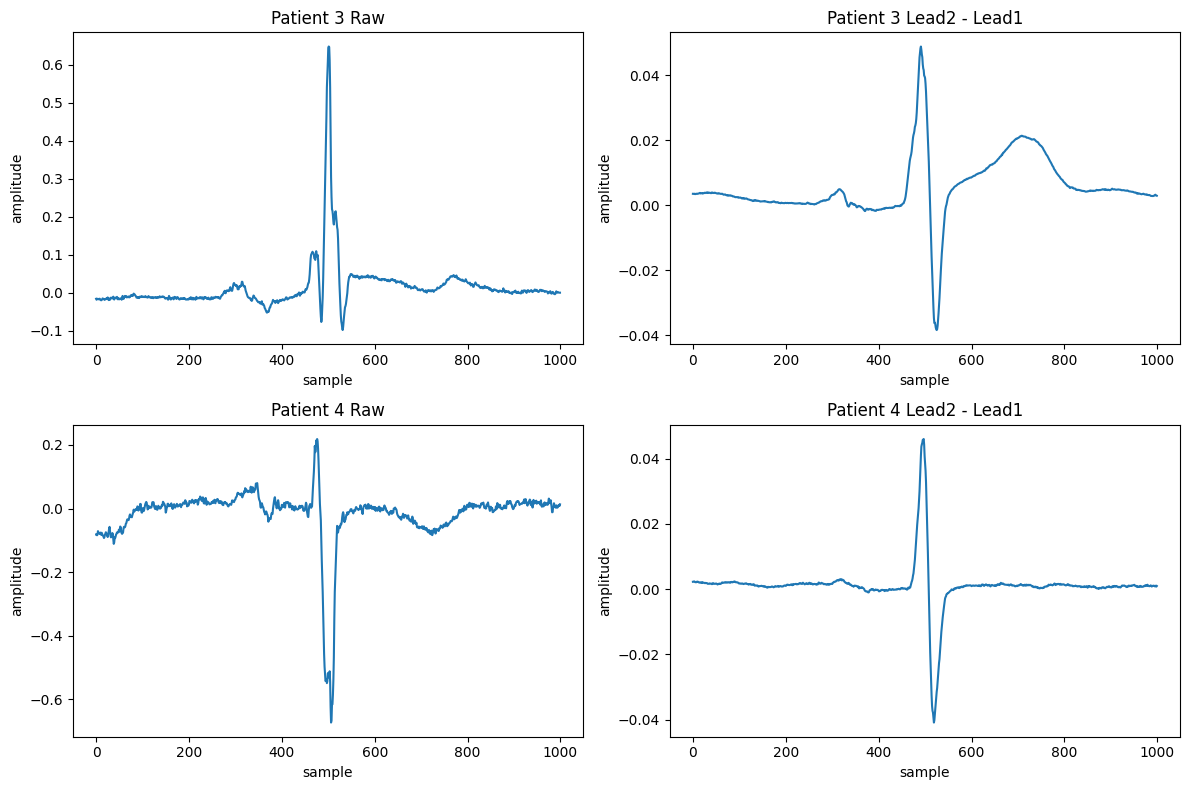

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(Set[3]['iii'])
plt.title('Patient 3 Raw')
plt.xlabel('sample')
plt.ylabel('amplitude')

plt.subplot(2, 2, 2)
plt.plot(data[3]['lead2_minus_lead1'])
plt.title('Patient 3 Lead2 - Lead1')
plt.xlabel('sample')
plt.ylabel('amplitude')

plt.subplot(2, 2, 3)
plt.plot(Set[4]['iii'])
plt.title('Patient 4 Raw')
plt.xlabel('sample')
plt.ylabel('amplitude')

plt.subplot(2, 2, 4)
plt.plot(data[4]['lead2_minus_lead1'])
plt.title('Patient 4 Lead2 - Lead1')
plt.xlabel('sample')
plt.ylabel('amplitude')

plt.tight_layout()
plt.show()

#LL 수정

In [ ]:
# VCG -로 데이터 주고 밑의 위치로 lead 1,2,3 구했을 때 정확도 향상
# 원인 불명 / VCG -가 된다면 위상이 반대가 된다
# -로 lead 구할때
#  vcg_vx = -Set[a].loc[:, 'vx']/15
#  vcg_vy = -Set[a].loc[:, 'vy']/15
#  vcg_vz = -Set[a].loc[:, 'vz']/15
# 코드 수정하면 된다.
# 자세한 사항 네이버 카페 'Lead 2 - Lead 1 Correlation 향상' 게시글 참고
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# 데이터 로드 및 스케일링
result = pd.read_csv('/content/drive/MyDrive/result2.csv')
result = -result / 15  # 데이터 스케일링

# 원통형 파라미터
a = 0.18  # x축 반경
b = 0.15  # y축 반경
height = 0.46  # 원통 높이

# 원통형 좌표 생성
theta = np.linspace(0, 2 * np.pi, 100)
y = np.linspace(-0.31,0.15, 50)  # 높이 방향 (y축)
theta, y = np.meshgrid(theta, y)

# 원통형 x, y, z 좌표
x = a * np.cos(theta)
  # 높이 방향 (y축)
z = b * np.sin(theta)  # 수직 방향 (z축)

# 그래프 초기화
fig = go.Figure()

# 원통 표면 추가
fig.add_trace(go.Surface(
    x=x, y=y, z=z,
    colorscale='Blues', opacity=0.5
))

# RA, LA, LL 포인트 추가
fig.add_trace(go.Scatter3d(
    x=[0.12], y=[0.1], z=[-0.15],
    mode='markers+text',
    marker=dict(color='orange', size=4),
    text=['RA'], textposition='top center',
    name='RA'
))

fig.add_trace(go.Scatter3d(
    x=[-0.12], y=[0.1], z=[-0.15],
    mode='markers+text',
    marker=dict(color='orange', size=4),
    text=['LA'], textposition='top center',
    name='LA'
))

fig.add_trace(go.Scatter3d(
    x=[-0.07], y=[-0.05], z=[-0.15],
    mode='markers+text',
    marker=dict(color='orange', size=4),
    text=['LL'], textposition='top center',
    name='LL'
))


# 결과 데이터 추가
fig.add_trace(go.Scatter3d(
    x=result['vx_sum'],
    y=result['vy_sum'],  # 높이 방향
    z=result['vz_sum'],  # 수직 방향
    mode='lines+markers',
    marker=dict(size=4, color=np.arange(len(result)), colorscale='Viridis', opacity=0.8),
    line=dict(color='blue', width=2)
))

# 레이아웃 설정
fig.update_layout(
    title=' Torso Model + 3D VCG 3 Lead Placement',
    scene=dict(
        xaxis=dict(title='X (m)', showgrid=True),
        yaxis=dict(title='Y (Height, m)', showgrid=True),
        zaxis=dict(title='Z (Vertical, m)', showgrid=True)
    )
)

fig.show()


In [ ]:
# 논문 사용 데이터

import numpy as np
import pandas as pd
import plotly.graph_objects as go

result = pd.read_csv('/content/drive/MyDrive/result2.csv')
result = result / 15  # 데이터 스케일링
a = 0.18
b = 0.15
height = 0.46

theta = np.linspace(0, 2 * np.pi, 100)
z = np.linspace(-0.31, 0.15, 50)  # 시작 위치 -31cm, 끝 위치 15cm

theta, z = np.meshgrid(theta, z)

x = a * np.cos(theta)
y = b * np.sin(theta)

fig = go.Figure()

# 첫 번째 그래프
fig.add_trace(go.Surface(x=x, y=y, z=z, colorscale='Blues', opacity=0.5))

# RA
RA_x = -a
RA_y = 0

fig.add_trace(go.Scatter3d(
    x=[-0.1],
    y=[0.13],
    z=[0],
    mode='markers+text',
    marker=dict(color='orange', size=4),
    text=['RA'],
    textposition='top center',
    name='Point'
))

# LL
LL_x = a
LL_y = 0

fig.add_trace(go.Scatter3d(
    x=[0.09],
    y=[0.14],
    z=[-0.13],
    mode='markers+text',
    marker=dict(color='orange', size=4),
    text=['LL'],
    textposition='top center',
    name='Point'
))

# LA
LA_x = a
LA_y = 0

fig.add_trace(go.Scatter3d(
    x=[0.1],
    y=[0.13],
    z=[0],
    mode='markers+text',
    marker=dict(color='orange', size=4),
    text=['LA'],
    textposition='top center',
    name='Point'
))

# 두 번째 그래프
fig.add_trace(go.Scatter3d(
    x=result['vx_sum'],
    y=result['vy_sum'],
    z=result['vz_sum'],
    mode='lines+markers',
    marker=dict(size=4, color=np.arange(1000), colorscale='Viridis', opacity=0.8),
    line=dict(color='blue', width=2)
))

# 레이아웃 설정
fig.update_layout(
    title='Torso Model + 3D VCG 3 Lead Placement',
    scene=dict(
        xaxis=dict(title='X (m)', showgrid=True,autorange="reversed"),
        yaxis=dict(title='Y (m)', showgrid=True,autorange="reversed"),
        zaxis=dict(title='Z (m)', showgrid=True)
    )
)

fig.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import pandas as pd
import numpy as np

# 초기 변수 설정
data = {}
RA = np.array([-0.10, 0.14, 0.09])  # y축 부호 반전
LA = np.array([0.10, 0.14, 0.09])   # y축 부호 반전
LL = np.array([0.1, 0.13, -0.02])       # LL은 y축이 이미 0이므로 변경 없음
omega_0 = 2.38
LL_minus_LA = LL - LA
LA_minus_RA = LA - RA
LL_minus_RA = LL - RA

for a in range (1,31):
# 데이터프레임 생성
  vcg_vx = Set[a].loc[:, 'vx']/15
  vcg_vy = Set[a].loc[:, 'vy']/15
  vcg_vz = Set[a].loc[:, 'vz']/15
  i_results = []
  ii_results = []
  iii_results = []
  lead2_minus_lead1 = []

  data[a] = pd.DataFrame({
    'vx': vcg_vx,
    'vy': vcg_vy,
    'vz': vcg_vz
  })

  # 반복문을 통한 계산
  for _, row in data[a].iterrows():  # 행 마다 계산 반복
      P = np.array([row['vx'], row['vy'], row['vz']])

    # lead 1
      r1 = P - RA
      r2 = P - LL

      r_diff_x = r2[0] - r1[0]
      r_diff_y = r2[1] - r1[1]
      r_diff_z = r2[2] - r1[2]

    # 벡터 크기 계산
      r_diff_norm = np.sqrt(r_diff_x**2 + r_diff_y**2 + r_diff_z**2)
      numerator = (P[0] * LA_minus_RA[0]) + (P[1] * LA_minus_RA[1]) + (P[2] * LA_minus_RA[2])
      denominator = 4 * np.pi * omega_0 * (r_diff_norm ** 3)
      lead_i = numerator / denominator if denominator != 0 else 0  # 0으로 나누는 경우 방지

      i_result = lead_i * (1 - (-1))  # (1, 0, -1)과 내적
      i_results.append(i_result)

    # lead 2
      r1 = P - RA
      r2 = P - LA

      r_diff_x = r2[0] - r1[0]
      r_diff_y = r2[1] - r1[1]
      r_diff_z = r2[2] - r1[2]

    # 벡터 크기 계산
      r_diff_norm = np.sqrt(r_diff_x**2 + r_diff_y**2 + r_diff_z**2)
      numerator = (P[0] * LL_minus_RA[0]) + (P[1] * LL_minus_RA[1]) + (P[2] * LL_minus_RA[2])
      denominator = 4 * np.pi * omega_0 * (r_diff_norm ** 3)
      lead_ii = numerator / denominator if denominator != 0 else 0  # 0으로 나누는 경우 방지

      ii_result = lead_ii * (1 - (-1))  # (1, 0, -1)과 내적
      ii_results.append(ii_result)

    # lead 3
      r1 = P - LA
      r2 = P - LL

      r_diff_x = r2[0] - r1[0]
      r_diff_y = r2[1] - r1[1]
      r_diff_z = r2[2] - r1[2]

    # 벡터 크기 계산
      r_diff_norm = np.sqrt(r_diff_x**2 + r_diff_y**2 + r_diff_z**2)
      numerator = (P[0] * LL_minus_LA[0]) + (P[1] * LL_minus_LA[1]) + (P[2] * LL_minus_LA[2])
      denominator = 4 * np.pi * omega_0 * (r_diff_norm ** 3)
      lead_iii = numerator / denominator if denominator != 0 else 0  # 0으로 나누는 경우 방지

      iii_result = lead_iii * (1 - (-1))  # (1, 0, -1)과 내적
      iii_results.append(iii_result)

# 결과를 데이터프레임에 추가
  data[a]['i_result'] = i_results
  data[a]['ii_result'] = ii_results
  data[a]['iii_result'] = iii_results
  data[a]['lead2_minus_lead1'] = data[a]['ii_result'] - data[a]['i_result']

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import pandas as pd

scaler = StandardScaler()

correlation_results_i = pd.DataFrame(columns=['pearson_corr', 'p_value'])
correlation_results_ii = pd.DataFrame(columns=['pearson_corr', 'p_value'])
correlation_results_iii = pd.DataFrame(columns=['pearson_corr', 'p_value'])
correlation_results_lead2_minus_lead1 = pd.DataFrame(columns=['pearson_corr', 'p_value'])

for a in range(1, 31):
    # lead i
    x_scaled = scaler.fit_transform(data[a]['i_result'].values.reshape(-1, 1)).flatten()
    y_scaled = scaler.fit_transform(Set[a]['i'].values.reshape(-1, 1)).flatten()
    pearson_corr, p_value = pearsonr(x_scaled, y_scaled)
    correlation_results_i.loc[a] = [pearson_corr, p_value]

    # lead ii
    x_scaled = scaler.fit_transform(data[a]['ii_result'].values.reshape(-1, 1)).flatten()
    y_scaled = scaler.fit_transform(Set[a]['ii'].values.reshape(-1, 1)).flatten()
    pearson_corr, p_value = pearsonr(x_scaled, y_scaled)
    correlation_results_ii.loc[a] = [pearson_corr, p_value]

    # lead iii
    x_scaled = scaler.fit_transform(data[a]['iii_result'].values.reshape(-1, 1)).flatten()
    y_scaled = scaler.fit_transform(Set[a]['iii'].values.reshape(-1, 1)).flatten()
    pearson_corr, p_value = pearsonr(x_scaled, y_scaled)
    correlation_results_iii.loc[a] = [pearson_corr, p_value]

    # lead iii(lead2_minus_lead1)
    x_scaled = scaler.fit_transform(data[a]['lead2_minus_lead1'].values.reshape(-1, 1)).flatten()
    y_scaled = scaler.fit_transform(Set[a]['iii'].values.reshape(-1, 1)).flatten()
    pearson_corr, p_value = pearsonr(x_scaled, y_scaled)
    correlation_results_lead2_minus_lead1.loc[a] = [pearson_corr, p_value]

# 결과 출력
print("Correlation Results for Lead I:")
print(correlation_results_i)
print("Correlation mean Lead I:")
print(np.mean(correlation_results_i['pearson_corr']))
print("\nCorrelation Results for Lead II:")
print(correlation_results_ii)
print("Correlation mean Lead II:")
print(np.mean(correlation_results_ii['pearson_corr']))
print("\nCorrelation Results for Lead III:")
print(correlation_results_iii)
print("Correlation mean Lead III:")
print(np.mean(correlation_results_iii['pearson_corr']))
print("\nCorrelation Results for lead2_minus_lead1:")
print(correlation_results_lead2_minus_lead1)
print("Correlation mean lead2_minus_lead1:")
print(np.mean(correlation_results_lead2_minus_lead1['pearson_corr']))

Correlation Results for Lead I:
    pearson_corr        p_value
1       0.976078   0.000000e+00
2       0.749287  8.026330e-181
3       0.971702   0.000000e+00
4       0.986983   0.000000e+00
5       0.781179  2.072705e-206
6       0.970434   0.000000e+00
7       0.951317   0.000000e+00
8       0.954982   0.000000e+00
9       0.961591   0.000000e+00
10      0.949076   0.000000e+00
11      0.974432   0.000000e+00
12      0.824679  3.099338e-249
13      0.846816  6.939315e-276
14      0.985754   0.000000e+00
15      0.710381  2.066837e-154
16      0.983573   0.000000e+00
17      0.964627   0.000000e+00
18      0.988780   0.000000e+00
19      0.968072   0.000000e+00
20      0.992898   0.000000e+00
21      0.953317   0.000000e+00
22      0.985882   0.000000e+00
23      0.920317   0.000000e+00
24      0.995708   0.000000e+00
25      0.984935   0.000000e+00
26      0.965770   0.000000e+00
27      0.992878   0.000000e+00
28      0.967688   0.000000e+00
29      0.961505   0.000000e+00
30      

# Lead2 - Lead1 Raw 데이터 확인

In [ ]:
min={}
minus=[]

for i in range(1,31):
  minus=Set[i]['ii'] - Set[i]['i']
  min[i] = pd.DataFrame({'minus': minus})


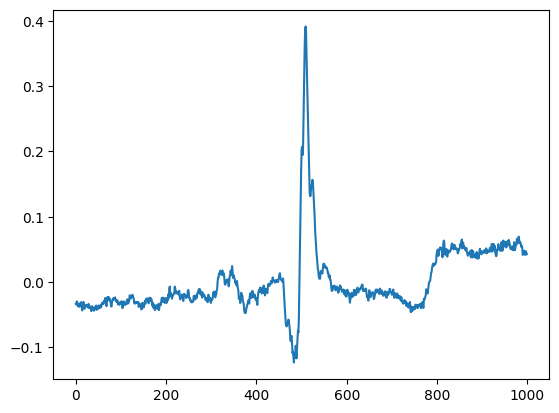

In [ ]:
plt.plot(min[21])

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import pandas as pd

scaler = StandardScaler()
results_a = pd.DataFrame(columns=['pearson_corr', 'p_value'])

for a in range(1, 31):
    x_scaled = scaler.fit_transform(min[a]['minus'].values.reshape(-1, 1)).flatten()
    y_scaled = scaler.fit_transform(Set[a]['iii'].values.reshape(-1, 1)).flatten()
    pearson_corr, p_value = pearsonr(x_scaled, y_scaled)
    results_a.loc[a] = [pearson_corr, p_value]

# 결과 출력
print(" Raw data Lead2- Lead1 :")
print(results_a)
print("Correlation mean:")
print(np.mean(results_a['pearson_corr']))

 Raw data Lead2- Lead1 :
    pearson_corr  p_value
1       0.999997      0.0
2       0.999987      0.0
3       0.999991      0.0
4       0.999995      0.0
5       0.999973      0.0
6       0.999980      0.0
7       0.999997      0.0
8       0.999992      0.0
9       0.999998      0.0
10      0.999983      0.0
11      0.999972      0.0
12      0.999990      0.0
13      0.999999      0.0
14      0.999988      0.0
15      0.999997      0.0
16      0.999991      0.0
17      0.999995      0.0
18      0.999968      0.0
19      0.999980      0.0
20      0.999985      0.0
21      0.999985      0.0
22      0.999990      0.0
23      0.999998      0.0
24      0.999979      0.0
25      0.999956      0.0
26      0.999983      0.0
27      0.999972      0.0
28      0.999998      0.0
29      0.999975      0.0
30      0.999975      0.0
Correlation mean:
0.999985652754979


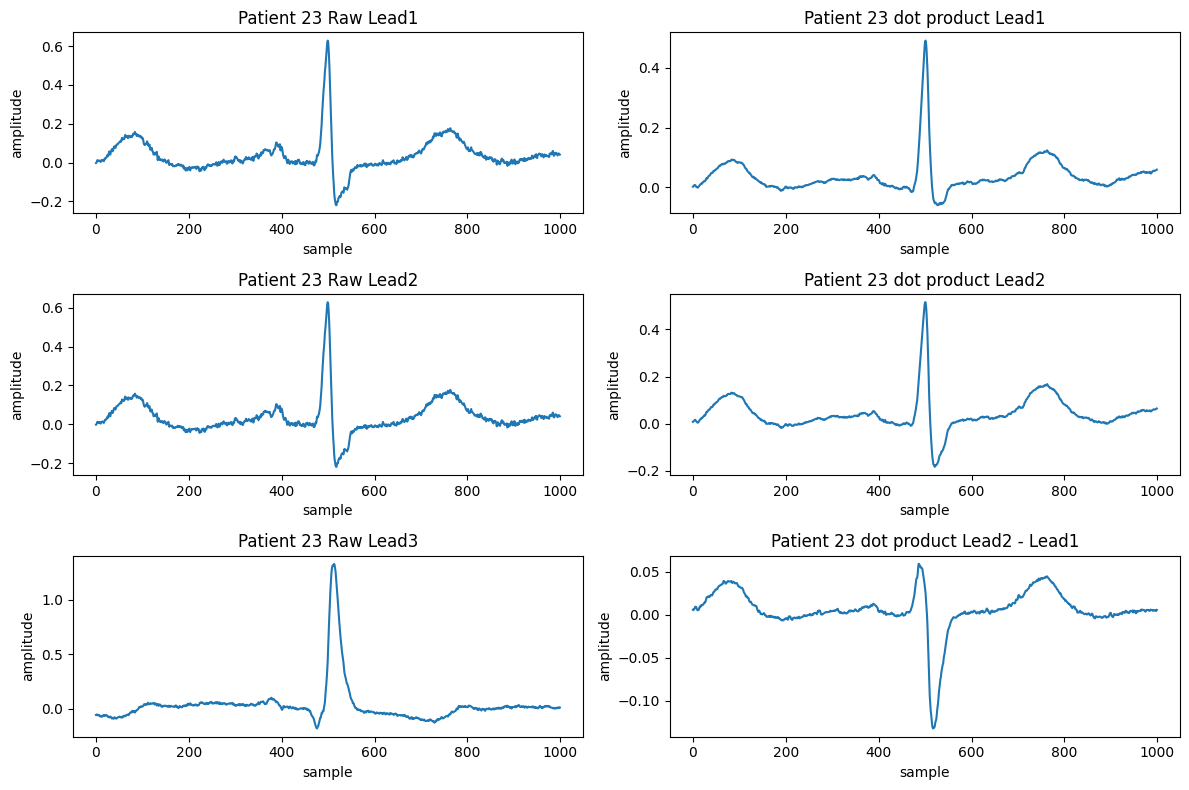

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(Set[23]['i'])
plt.title('Patient 23 Raw Lead1')
plt.xlabel('sample')
plt.ylabel('amplitude')

plt.subplot(3, 2, 2)
plt.plot(data[23]['i_result'])
plt.title('Patient 23 dot product Lead1')
plt.xlabel('sample')
plt.ylabel('amplitude')

plt.subplot(3, 2, 3)
plt.plot(Set[23]['i'])
plt.title('Patient 23 Raw Lead2')
plt.xlabel('sample')
plt.ylabel('amplitude')

plt.subplot(3, 2, 4)
plt.plot(data[23]['ii_result'])
plt.title('Patient 23 dot product Lead2')
plt.xlabel('sample')
plt.ylabel('amplitude')

plt.subplot(3, 2, 5)
plt.plot(Set[23]['iii'])
plt.title('Patient 23 Raw Lead3')
plt.xlabel('sample')
plt.ylabel('amplitude')

plt.subplot(3, 2, 6)
plt.plot(data[23]['lead2_minus_lead1'])
plt.title('Patient 23 dot product Lead2 - Lead1')
plt.xlabel('sample')
plt.ylabel('amplitude')

plt.tight_layout()
plt.show()

In [ ]:
data[23]['ii_result']
data[23]['ii_result'].to_csv('ii.csv', index=False)

In [ ]:
data[23]['i_result']
data[23]['i_result'].to_csv('i.csv', index=False)

In [ ]:
ss=pd.read_csv('aa.csv')

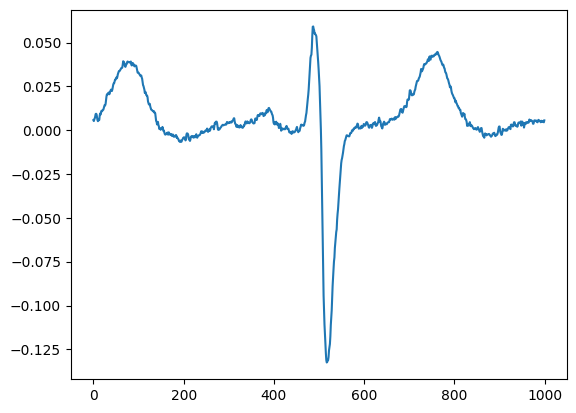

In [ ]:
plt.plot(ss['ii-i'])

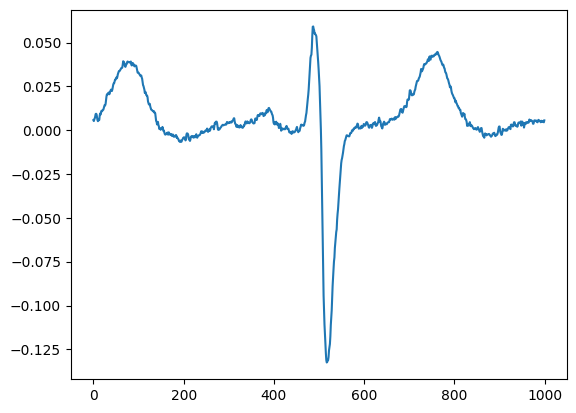

In [ ]:
df = pd.DataFrame()
df['Interpolated_Signal'] = data[23]['lead2_minus_lead1'].interpolate(method='polynomial', order=2)

plt.plot(df['Interpolated_Signal'])